### Preprocessing Steps:

To ensure that our data analysis yields accurate and meaningful insights, it was necessary to perform several preprocessing steps on the dataset. These steps focused on cleaning and organizing the **Close** column to address common data quality issues. Specifically, we needed to remove outliers, impute missing values, and sort the data based on their dates.

Outliers in the **Close** column can skew analysis and misrepresent trends, so we identified and removed them using the Interquartile Range (IQR). Missing values were addressed through imputation, using forward and backward fill methods to ensure continuity in the data. Additionally, sorting the data chronologically by the **Date** column was essential for time-series analysis, allowing us to identify trends and patterns over time.

By applying these preprocessing steps, we created a clean, well-structured dataset that enables better insights and more reliable visualizations in subsequent plots.

In [1]:
# Preprocessing steps for "Close" column

import os
import pandas as pd
import numpy as np

# Step 1: Specify the folder containing the CSV files
folder_path = "Team_3"  

# Initialize a dictionary to hold the data for the DataFrame
data_dict = {}

# Step 2: Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    print(f"Analyzing file: {file_name}")
    
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Remove duplicate rows based on the 'Date' column, keeping the first occurrence
    data = data.drop_duplicates(subset='Date', keep='first')

    # Sort the dataset by the 'Date' column
    if 'Date' in data.columns:
        # Convert 'Date' column to datetime format if not already
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
        data = data.sort_values(by='Date').reset_index(drop=True)

    # Calculate Q1 and Q3 for "Close" column
    Q1 = data['Close'].quantile(0.25)
    Q3 = data['Close'].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Replace outliers in 'Close' column with NaN
    data['Close'] = data['Close'].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

    # Impute missing values in 'Close' column using linear interpolation, then backward and forward fill
    data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

    # Add the cleaned dataset to the dictionary with the filename as the key
    data_dict[file_name] = data


Analyzing file: BRK-A.csv
Analyzing file: DNUT.csv
Analyzing file: DPZ.csv
Analyzing file: LKNCY.csv
Analyzing file: MCD.csv
Analyzing file: PZZA.csv
Analyzing file: QSR.csv
Analyzing file: SBUX.csv
Analyzing file: WEN.csv
Analyzing file: YUM.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_60532\856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\acer\AppData\Local\Temp\ipykernel_60532\856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\acer\AppData\Local\Temp\ipykernel_60532\856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\acer\AppData\Local\Temp\ipykernel_60532\856490152.py:45: FutureWarning: S

## Exercises

<div class="alert alert-info"><b> Exercise 1 </b>

For each dataset:
- Print the number of rows and columns
- Display the column names and their data types

<div>

In [2]:
# 1

# Iterate through the data in data_dict which is created after preprocessing steps
for file_name, data in data_dict.items():
    print(f"Analyzing file: {file_name}")
    
    # Print the number of rows and columns
    print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")
    
    # Display column names and their data types
    print("Column names and data types:")
    print(data.dtypes)
    print("-" * 40)

Analyzing file: BRK-A.csv
Number of rows: 11222, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------------
Analyzing file: DNUT.csv
Number of rows: 810, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------------
Analyzing file: DPZ.csv
Number of rows: 5083, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: obje

<div class="alert alert-info"><b> Exercise 2 </b>

Extract all rows where the date is in the year 2023. Print the number of rows and visualize the ```Close``` price trend for this period.

<div>

Processing file: BRK-A.csv
Number of rows where the date is in 2023: 250


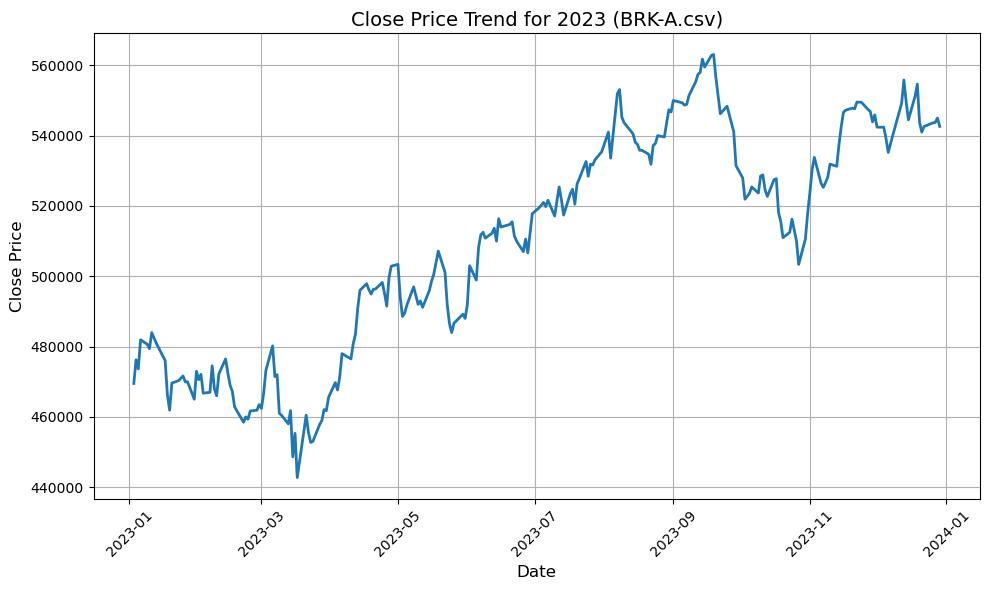

----------------------------------------
Processing file: DNUT.csv
Number of rows where the date is in 2023: 250


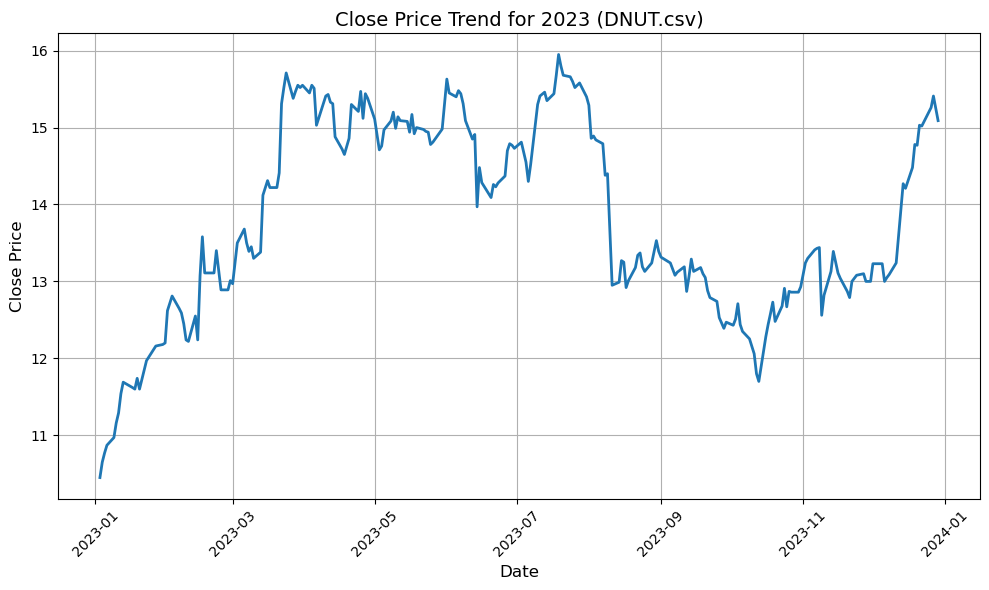

----------------------------------------
Processing file: DPZ.csv
Number of rows where the date is in 2023: 250


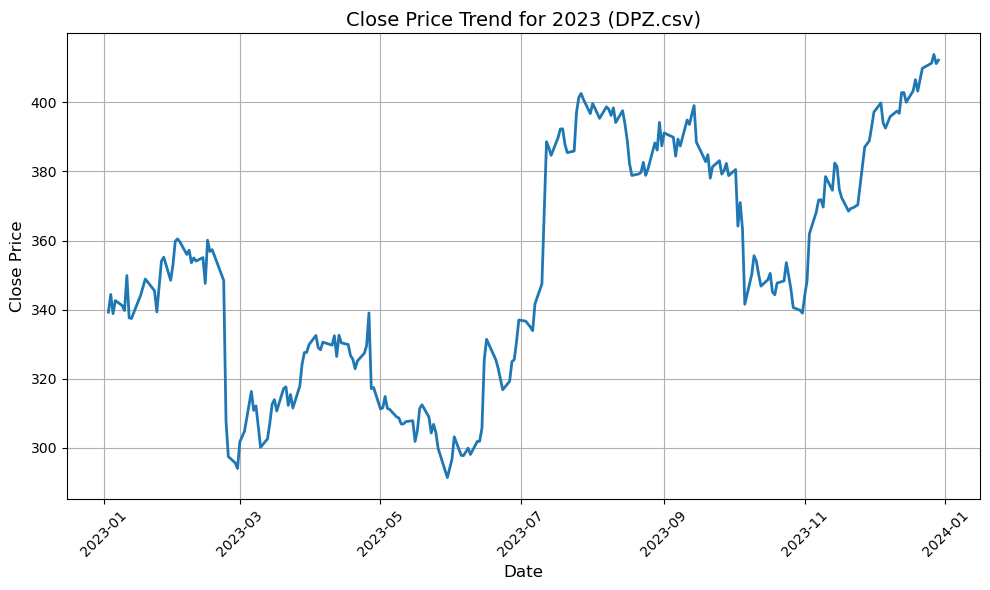

----------------------------------------
Processing file: LKNCY.csv
Number of rows where the date is in 2023: 250


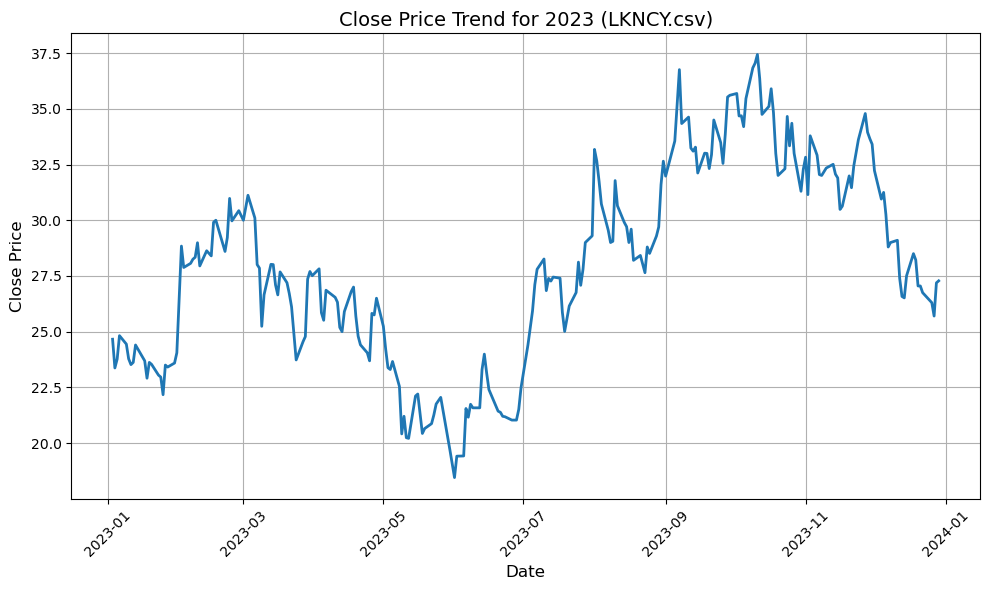

----------------------------------------
Processing file: MCD.csv
Number of rows where the date is in 2023: 250


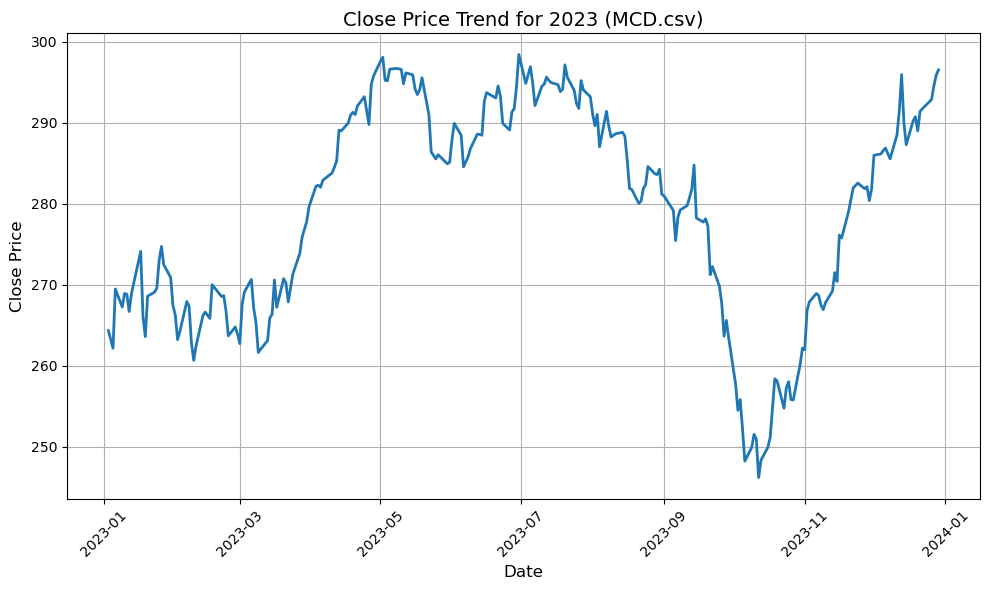

----------------------------------------
Processing file: PZZA.csv
Number of rows where the date is in 2023: 250


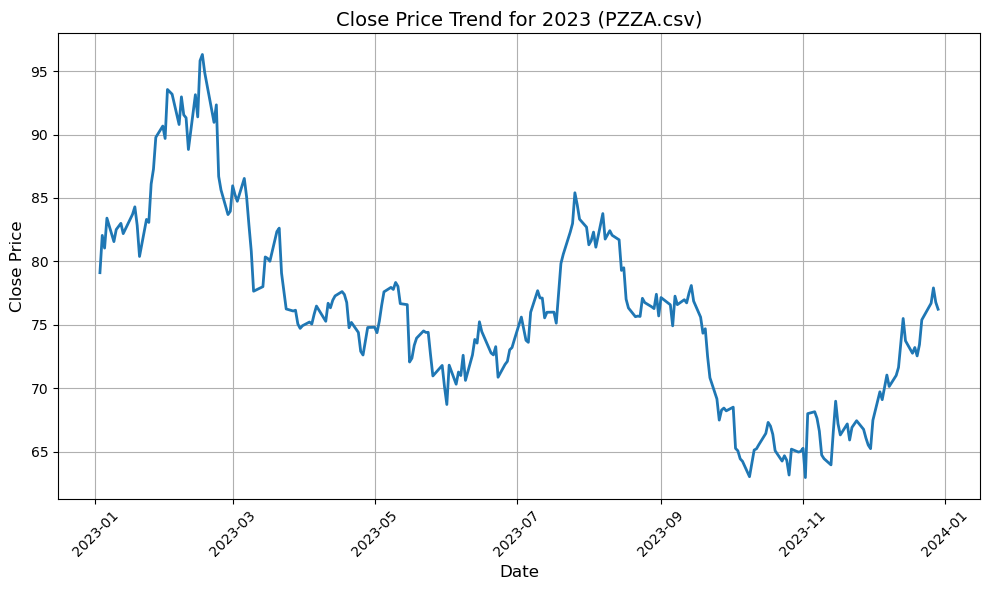

----------------------------------------
Processing file: QSR.csv
Number of rows where the date is in 2023: 250


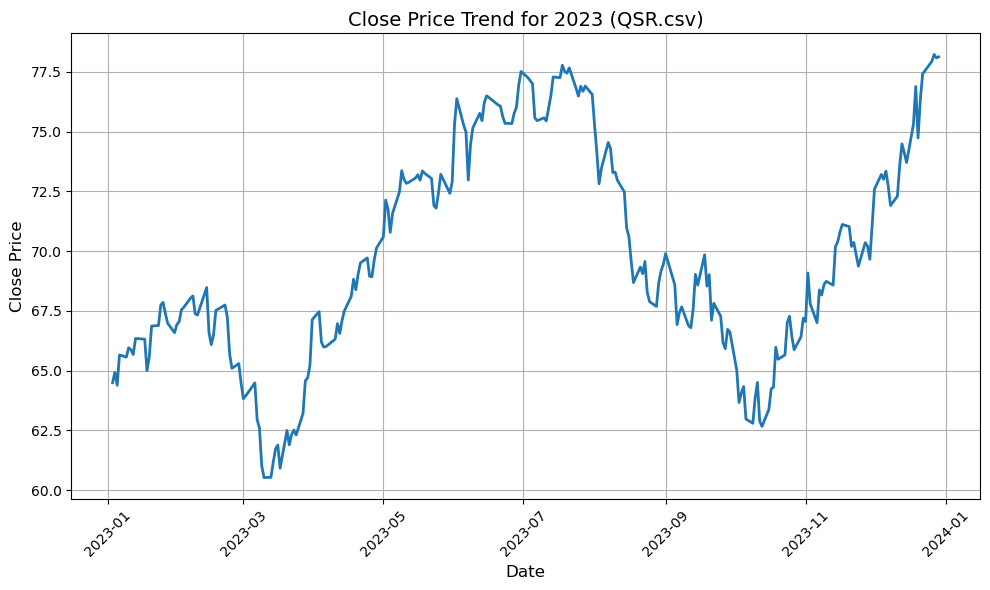

----------------------------------------
Processing file: SBUX.csv
Number of rows where the date is in 2023: 250


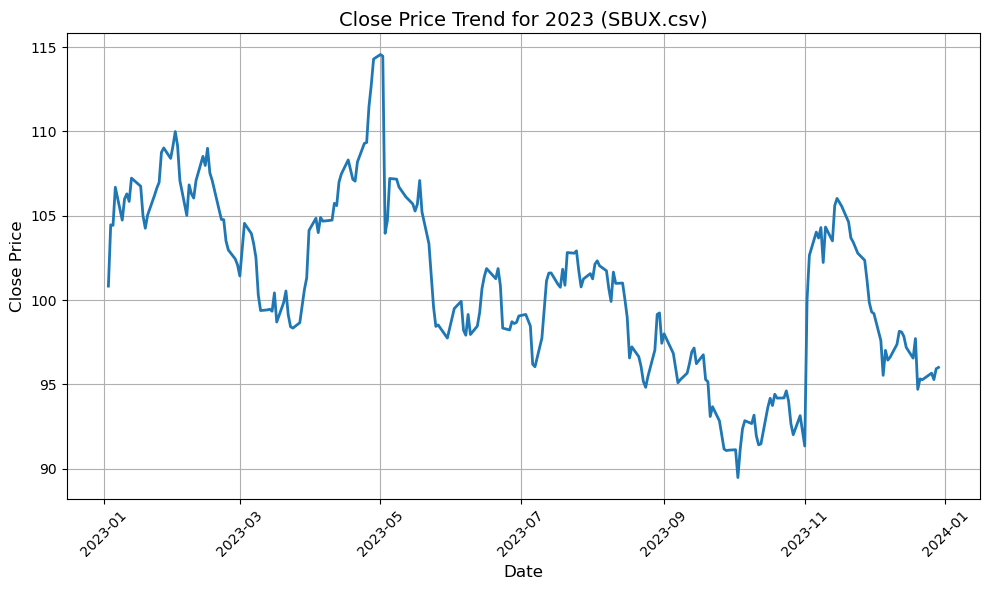

----------------------------------------
Processing file: WEN.csv
Number of rows where the date is in 2023: 250


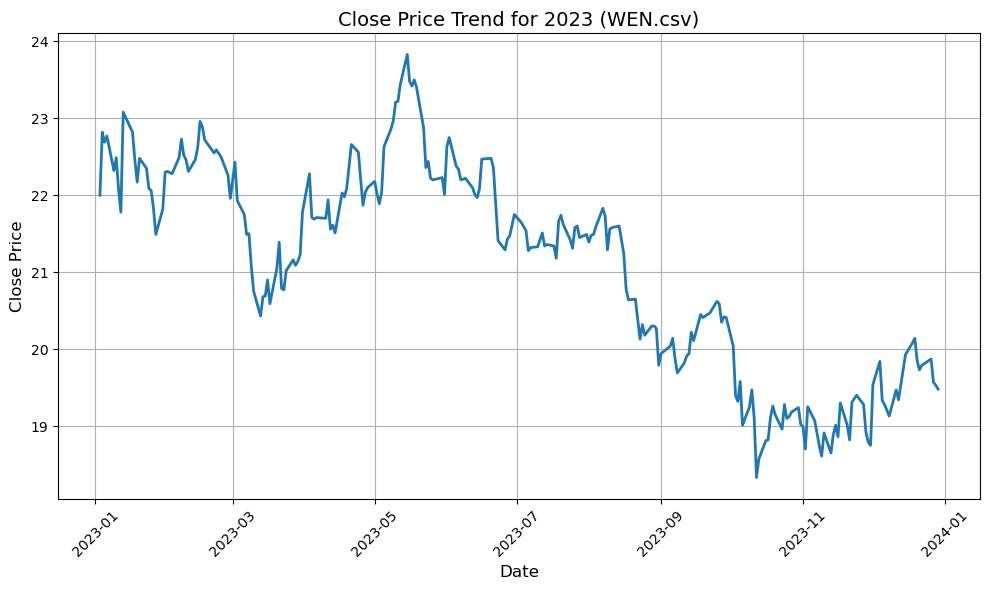

----------------------------------------
Processing file: YUM.csv
Number of rows where the date is in 2023: 250


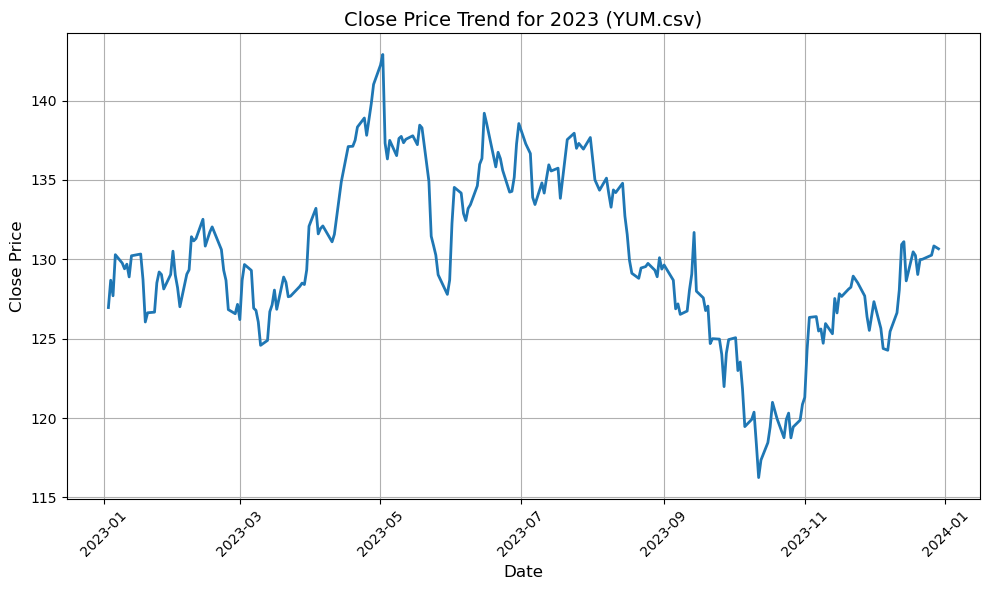

----------------------------------------


In [3]:
# 2

import matplotlib.pyplot as plt

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    print(f"Processing file: {file_name}")
    
    # Convert the Date column to datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Handle potential parsing issues
    if data['Date'].isna().any():
        print(f"Warning: Some dates could not be parsed in {file_name}. Skipping invalid rows.")
        data = data.dropna(subset=['Date'])  # Drop rows where Date conversion failed

    # Filter rows for the year 2023
    data_2023 = data[data['Date'].dt.year == 2023]

    # Print the number of rows
    print(f"Number of rows where the date is in 2023: {data_2023.shape[0]}")

    # Visualize the Close price trend
    if not data_2023.empty:  # Check if there are rows for 2023
        plt.figure(figsize=(10, 6))
        plt.plot(data_2023['Date'], data_2023['Close'], linestyle='-', linewidth=2)  # Removed marker for a cleaner plot
        plt.title(f'Close Price Trend for 2023 ({file_name})', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Close Price', fontsize=12)
        plt.grid()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data for 2023 in {file_name}. Skipping visualization.")
    
    print("-" * 40)


<div class="alert alert-info"><b> Exercise 3 </b>

For each company, find the day with the highest Close price and display it alongside the price.

<div>

In [4]:
# 3

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    print(f"Processing file: {file_name}")
    
    # Find the row with the highest Close price
    if not data.empty:
        max_close_row = data.loc[data['Close'].idxmax()]
        highest_date = max_close_row['Date']
        highest_price = max_close_row['Close']
        print(f"Highest Close price for {file_name}: {highest_price} on {highest_date}")
    else:
        print(f"No valid Close data in {file_name}.")
    
    print("-" * 40)


Processing file: BRK-A.csv
Highest Close price for BRK-A.csv: 715910.0 on 2024-09-03 00:00:00
----------------------------------------
Processing file: DNUT.csv
Highest Close price for DNUT.csv: 21.0 on 2021-07-01 00:00:00
----------------------------------------
Processing file: DPZ.csv
Highest Close price for DPZ.csv: 564.3300170898438 on 2021-12-31 00:00:00
----------------------------------------
Processing file: LKNCY.csv
Highest Close price for LKNCY.csv: 50.02000045776367 on 2020-01-17 00:00:00
----------------------------------------
Processing file: MCD.csv
Highest Close price for MCD.csv: 300.5299987792969 on 2024-01-19 00:00:00
----------------------------------------
Processing file: PZZA.csv
Highest Close price for PZZA.csv: 140.00999450683594 on 2021-11-04 00:00:00
----------------------------------------
Processing file: QSR.csv
Highest Close price for QSR.csv: 82.75 on 2024-03-13 00:00:00
----------------------------------------
Processing file: SBUX.csv
Highest Close p

<div class="alert alert-info"><b> Exercise 4 </b>

Group the data by month and calculate the average ```Close``` price for each company. Plot these monthly
averages for 3 companies and compare them. Justify the chart selection.

<div>

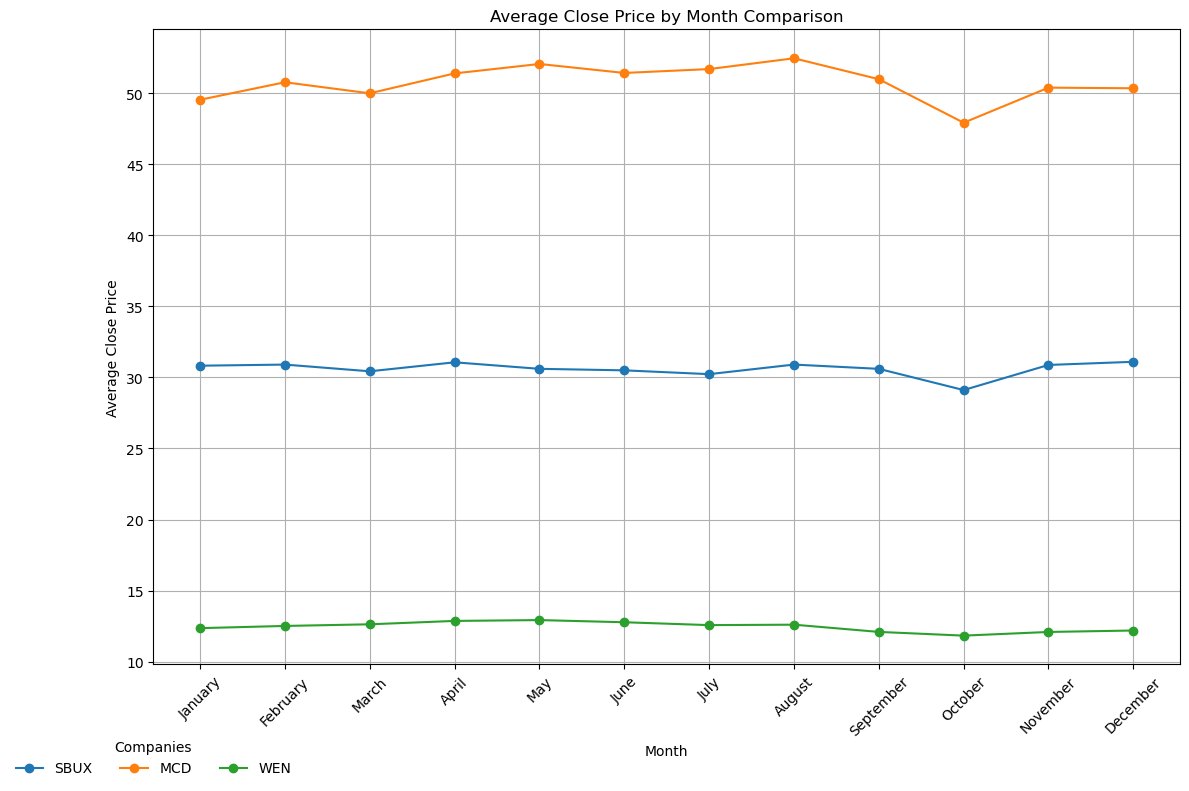

In [5]:
# 4

# Dictionary to store monthly average Close prices for selected companies
monthly_avg_data = {}

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():

    # Extract month and calculate average Close price across all years
    data['Month'] = data['Date'].dt.month  # Extract month as an integer
    monthly_avg = data.groupby('Month')['Close'].mean().reset_index()
    monthly_avg_data[file_name] = monthly_avg  # Store the data

#Plot these monthly averages for 3 companies and compare them. 
three_chosen_companies= ['SBUX.csv', 'MCD.csv', 'WEN.csv']

plt.figure(figsize=(12, 8))

# Month labels for the x-axis
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the monthly average Close prices for the selected companies
for company in three_chosen_companies:
    monthly_avg = monthly_avg_data[company]
    label = company.replace('.csv', '')  # Remove the .csv extension for readability
    plt.plot(monthly_avg['Month'], monthly_avg['Close'], marker='o', linestyle='-', label=label)

# Chart details
plt.title('Average Close Price by Month Comparison')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(ticks=range(1, 13), labels=month_labels, rotation=45)  # Set the labels for the months
plt.legend(title="Companies", loc='upper center', bbox_to_anchor=(0.0, -0.1), ncol=3, frameon=False)
plt.grid()
plt.tight_layout()
plt.show()


Justify the chart selection: A line chart is suitable for comparing trends over time for multiple datasets.
It allows us to clearly observe differences and similarities in monthly average trends across companies.

<div class="alert alert-info"><b> Exercise 5 </b>

For each company:
- Compute the yearly average of the ```Close``` price
- Plot a comparison of yearly averages for all companies on a chart. Justify your chart selection

</div>

Yearly Average Close Prices for BRK-A:
    Year          Close
0   1980     353.109453
1   1981     493.221344
2   1982     541.304348
3   1983    1029.693676
4   1984    1283.013834
5   1985    1982.704365
6   1986    2776.754941
7   1987    3443.478261
8   1988    4048.666008
9   1989    6798.803571
10  1990    6873.330040
11  1991    8229.071146
12  1992    9347.362205
13  1993   15010.286561
14  1994   17691.507937
15  1995   25517.509921
16  1996   32682.677165
17  1997   41950.760870
18  1998   65228.769841
19  1999   66589.801587
20  2000   57303.799603
21  2001   68754.778226
22  2002   72347.500000
23  2003   73409.007937
24  2004   88331.962302
25  2005   85987.267857
26  2006   94462.882470
27  2007  116516.635458
28  2008  122193.357708
29  2009   93775.765873
30  2010  117733.240079
31  2011  116436.079365
32  2012  125172.582000
33  2013  165326.051587
34  2014  195637.795635
35  2015  210576.757937
36  2016  216170.517857
37  2017  262749.195219
38  2018  305858.300797
3

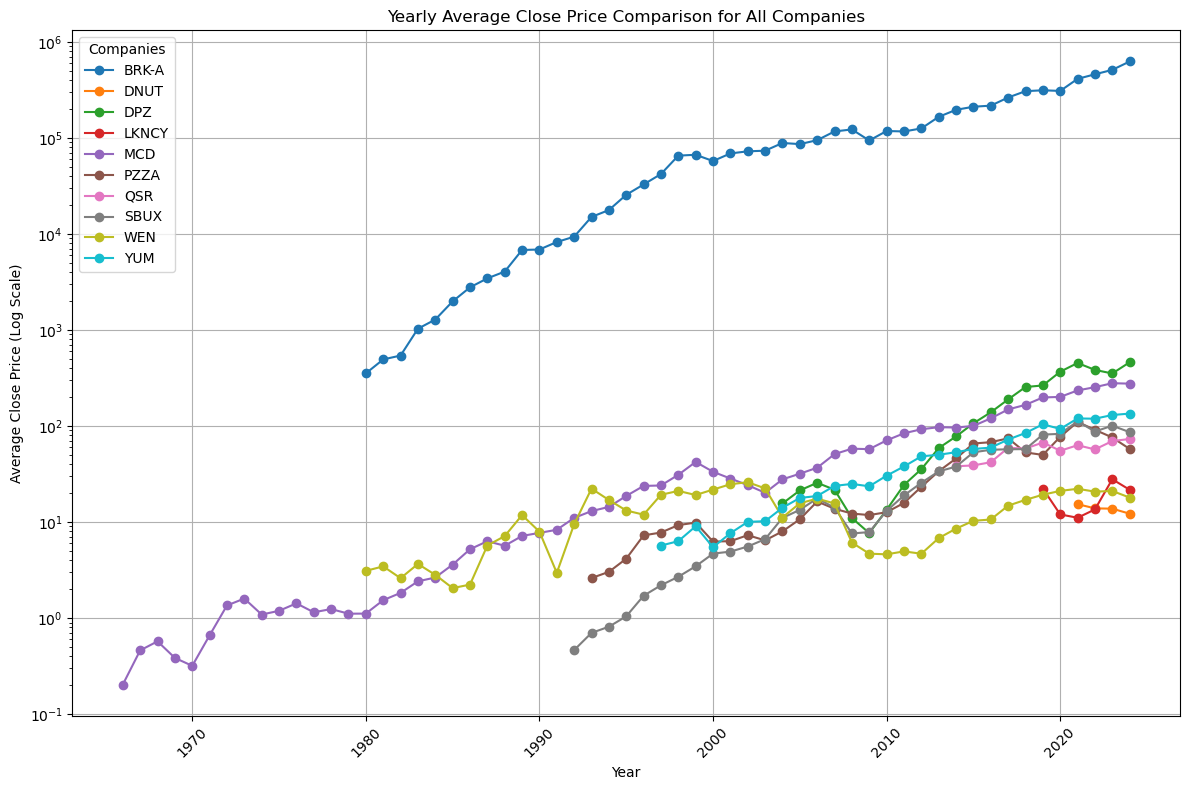

In [6]:
# 5

# Dictionary to store yearly average Close prices for each company
yearly_avg_data = {}

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    
    # Extract year and calculate average Close price for each year
    data['Year'] = data['Date'].dt.year  # Extract the year
    yearly_avg = data.groupby('Year')['Close'].mean().reset_index()
    company_name = file_name.replace('.csv', '')  # Use the file name without extension as the company name
    yearly_avg_data[company_name] = yearly_avg  # Store the data

    # Print the yearly average Close prices for the company
    print(f"Yearly Average Close Prices for {company_name}:")
    print(yearly_avg)
    print("-" * 40)

# Prepare data for plotting
plt.figure(figsize=(12, 8))

# Plot the yearly average Close prices for all companies
for company, yearly_avg in yearly_avg_data.items():
    plt.plot(yearly_avg['Year'], yearly_avg['Close'], marker='o', linestyle='-', label=company)

# Chart details
plt.title('Yearly Average Close Price Comparison for All Companies')
plt.xlabel('Year')
plt.ylabel('Average Close Price (Log Scale)')
#using logarithmic y-scale to compress large values and better visualize smaller ones
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title="Companies")
plt.grid()
plt.tight_layout()
plt.show()


Justify your chart selection: A line chart is the best option here because it is easy to compare changes in yearly averages Close prices and also compare trends for different companies over time.

<div class="alert alert-info"><b> Exercise 6 </b>

For each company create a plot showing the range of prices for each month and justify the chart selection.

</div>

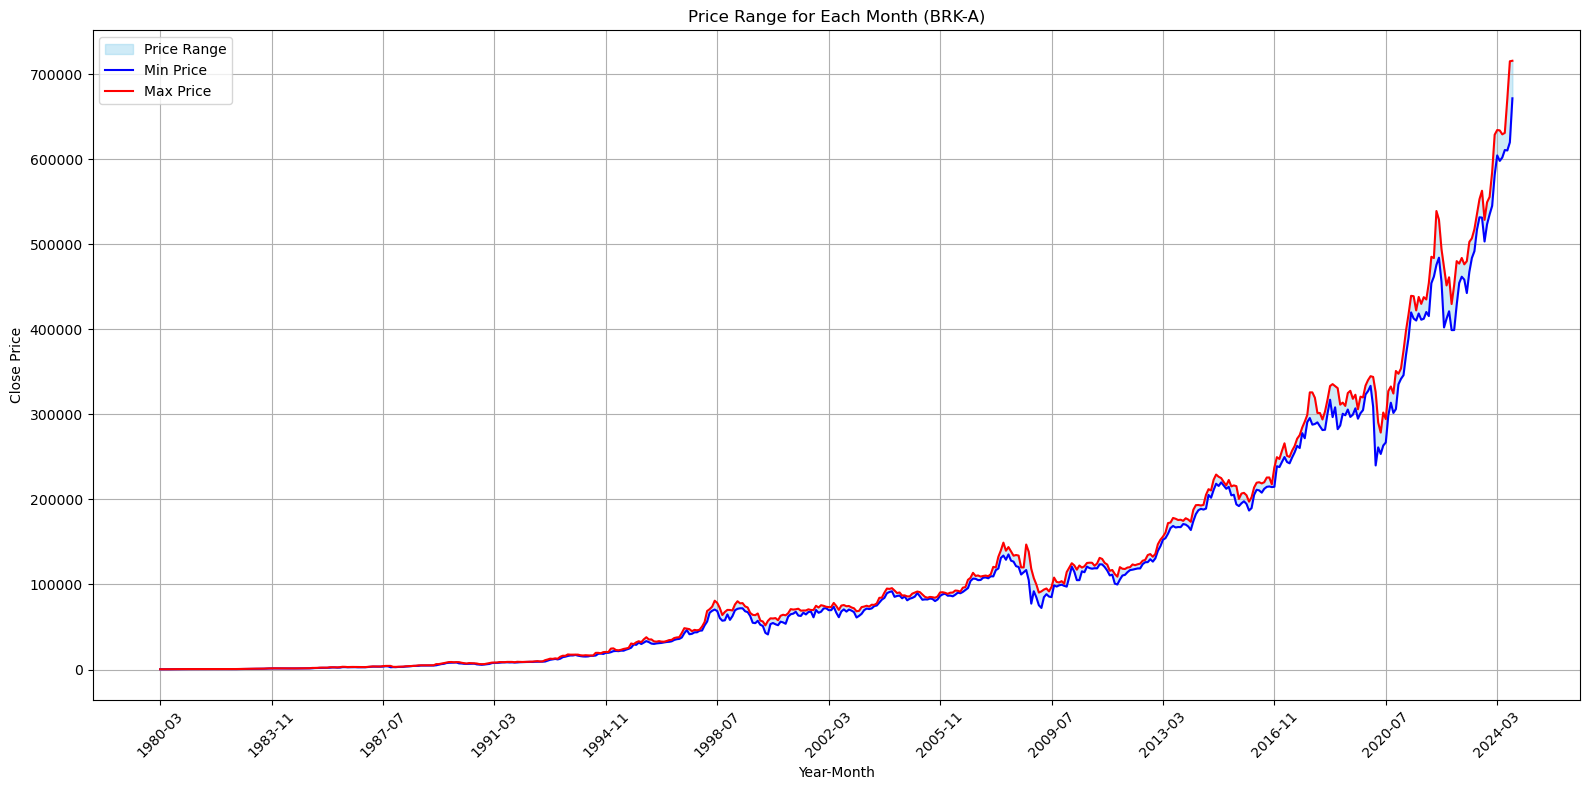

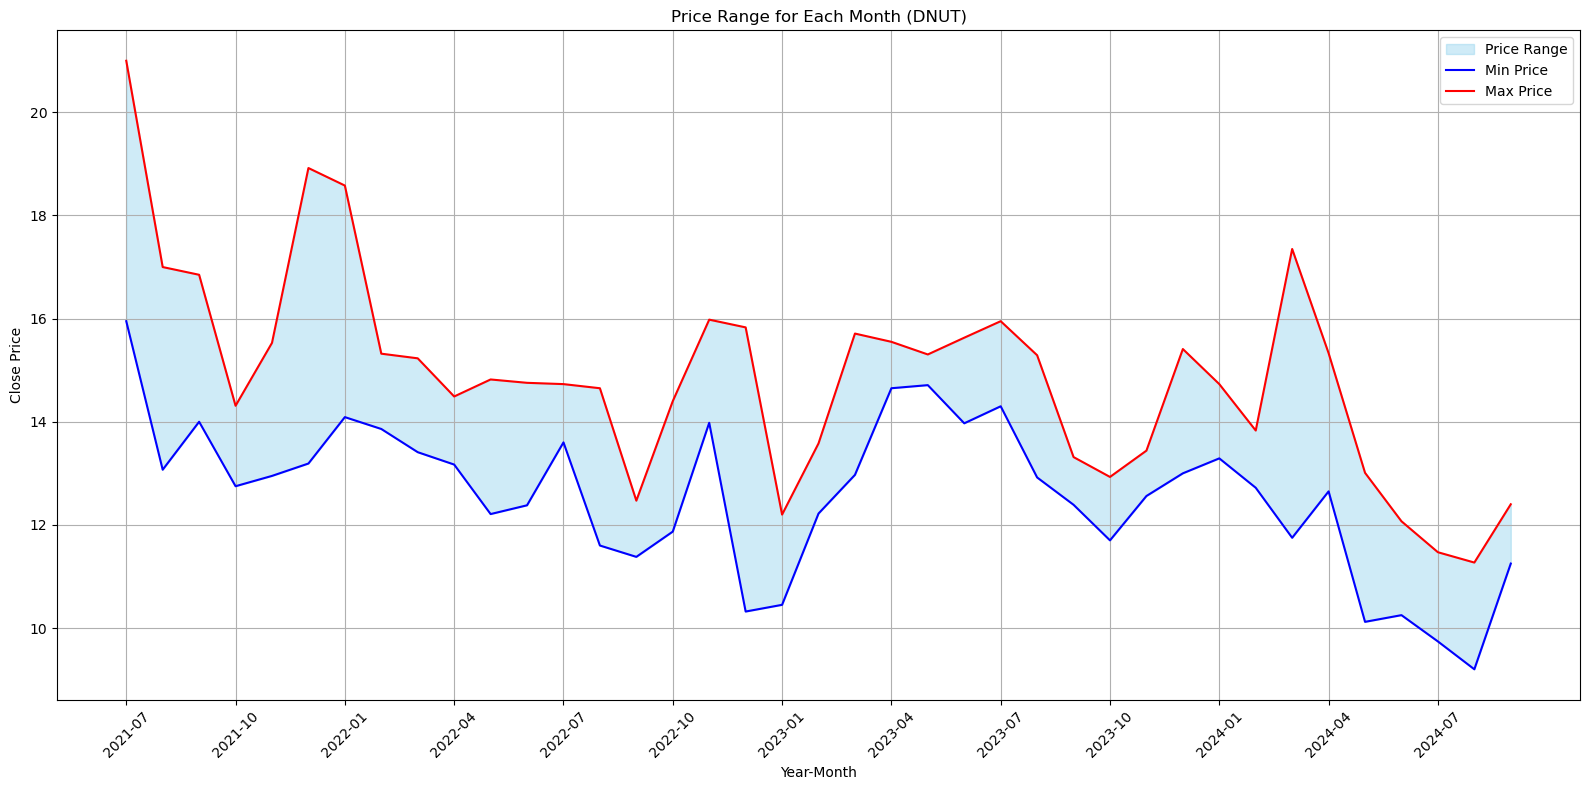

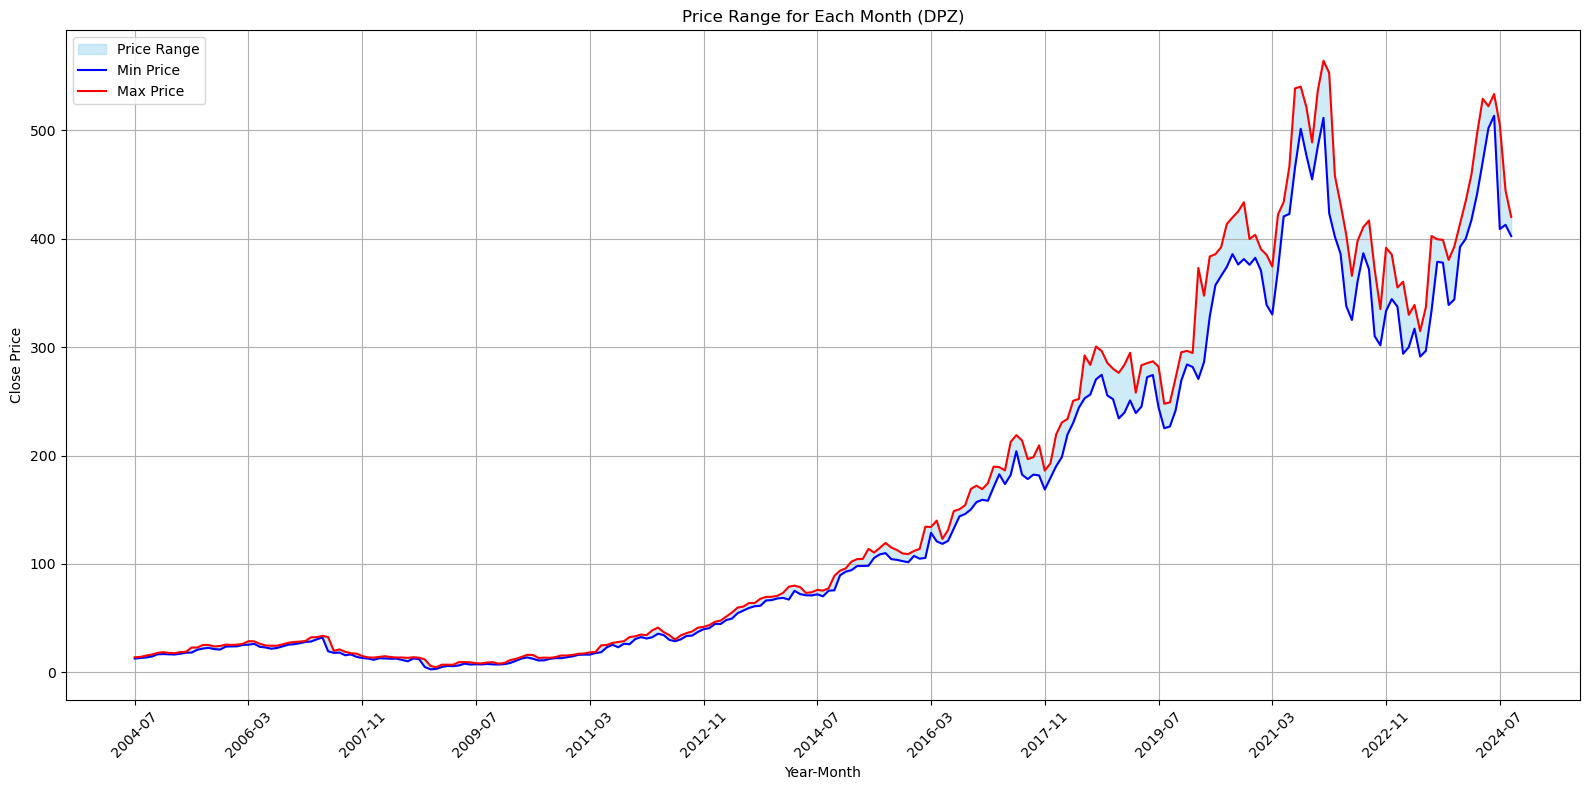

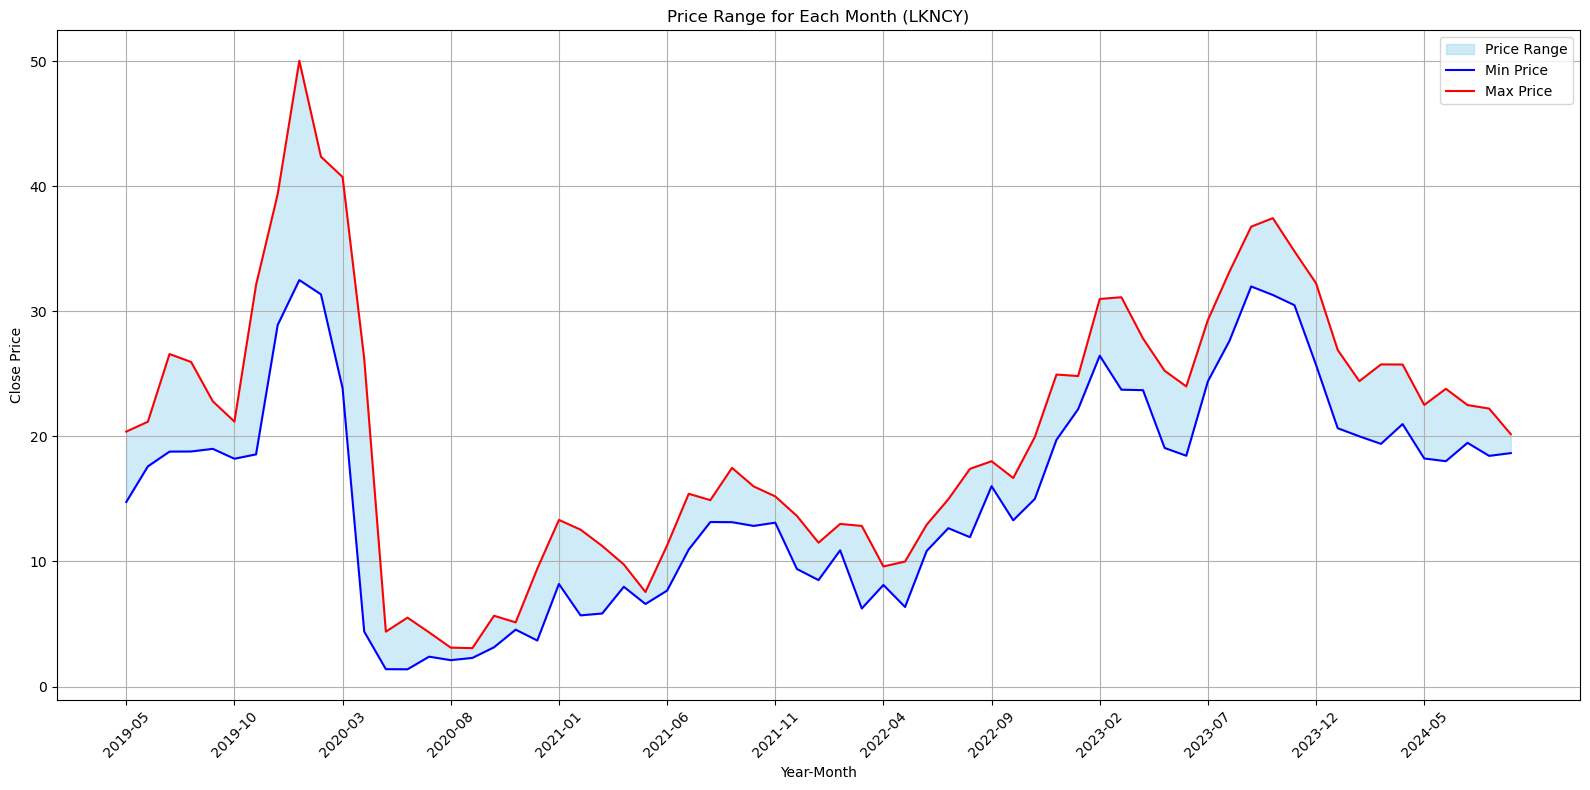

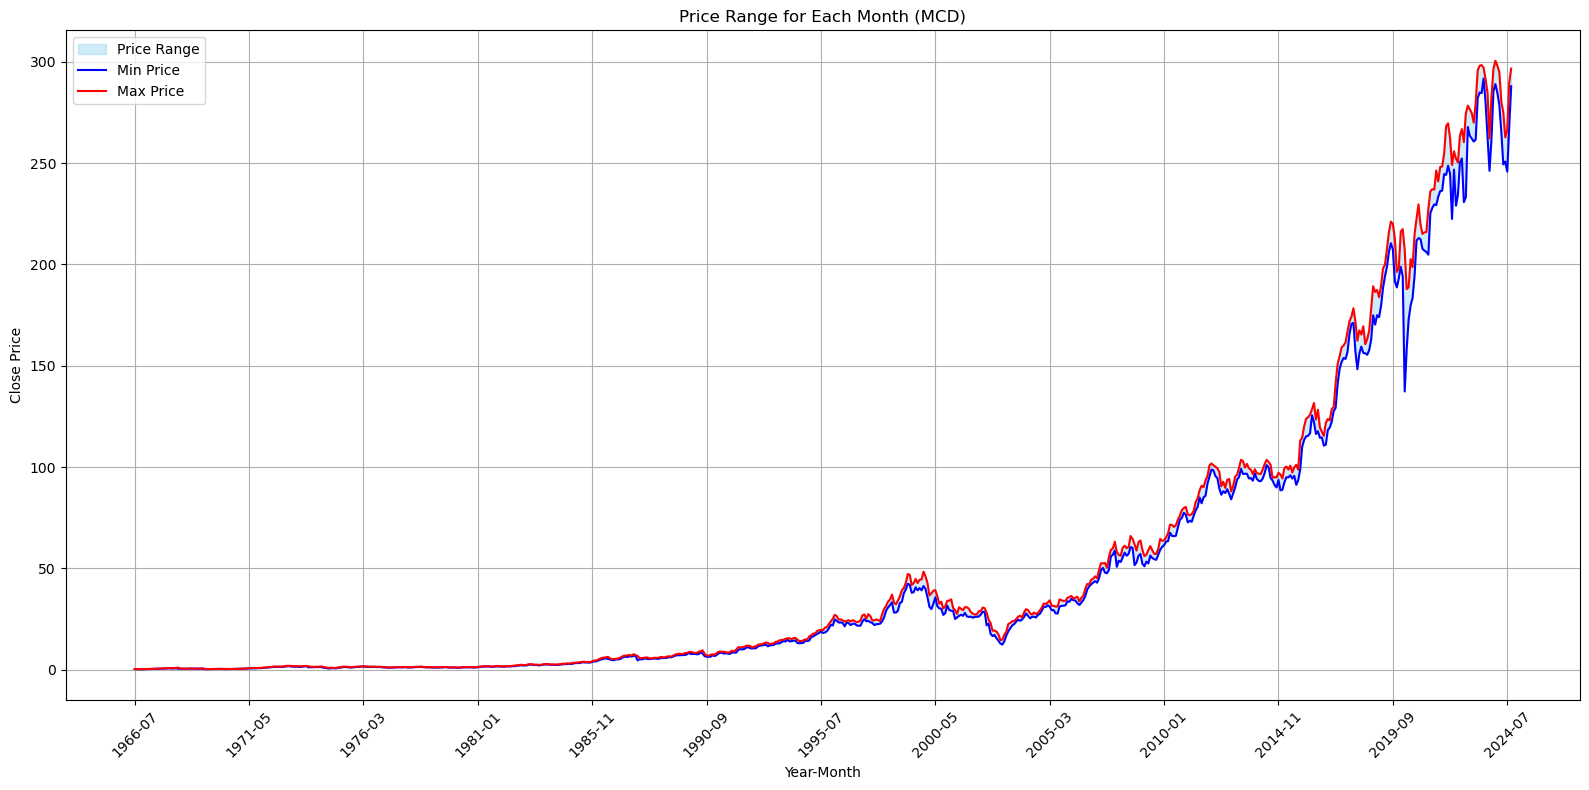

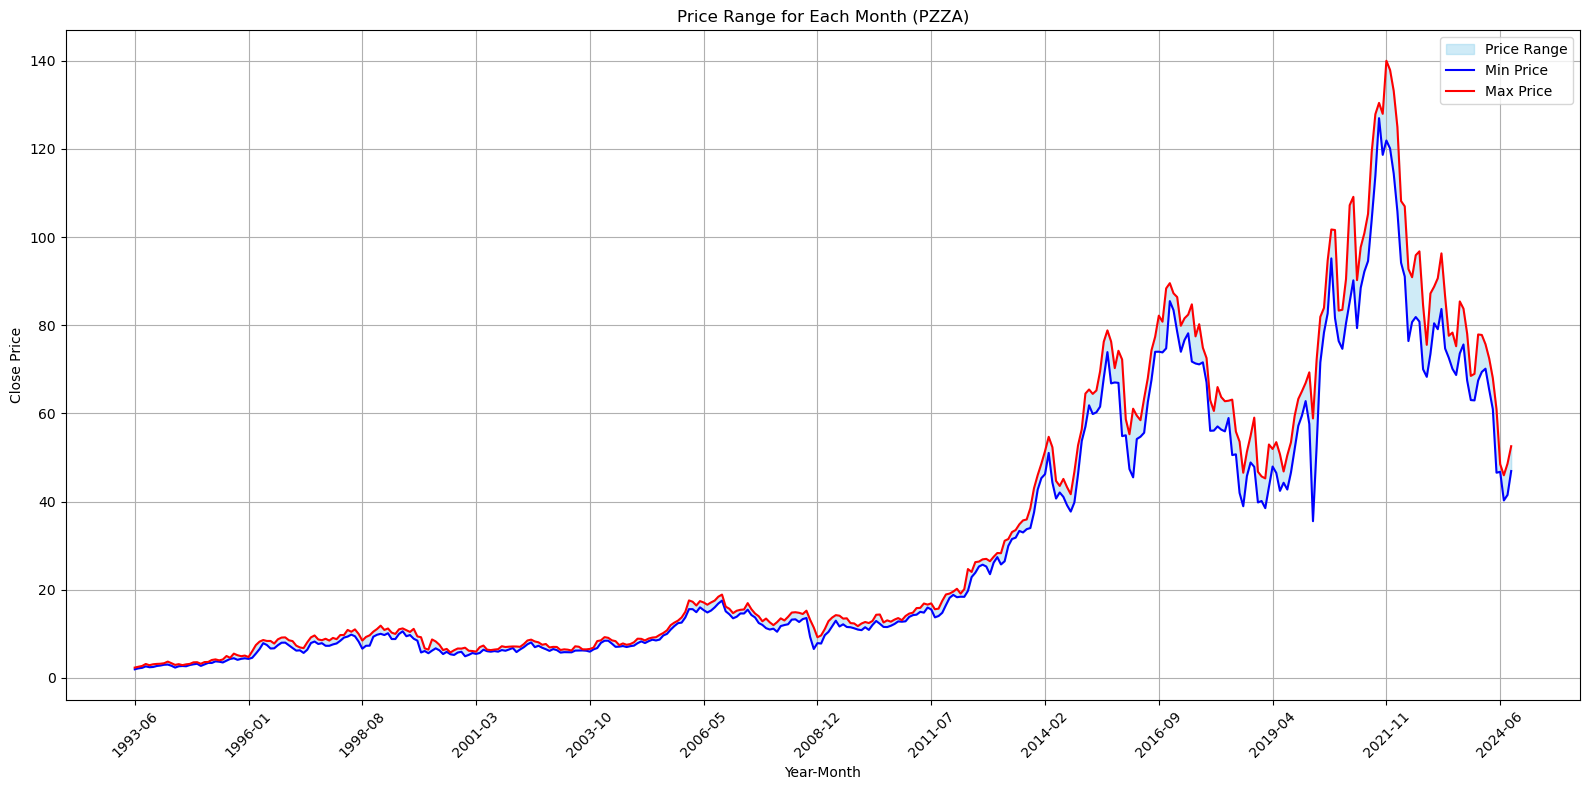

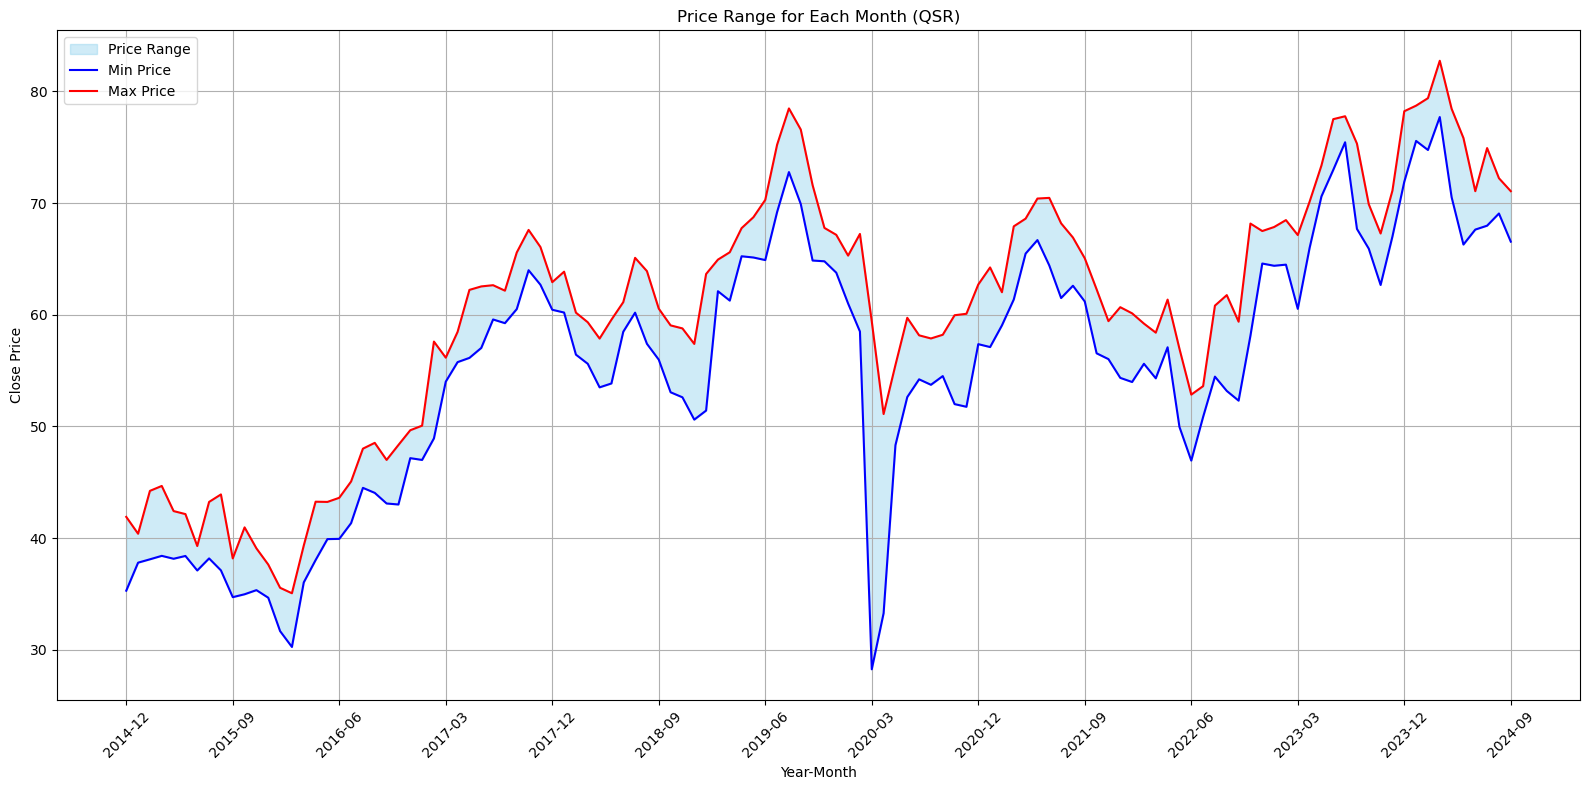

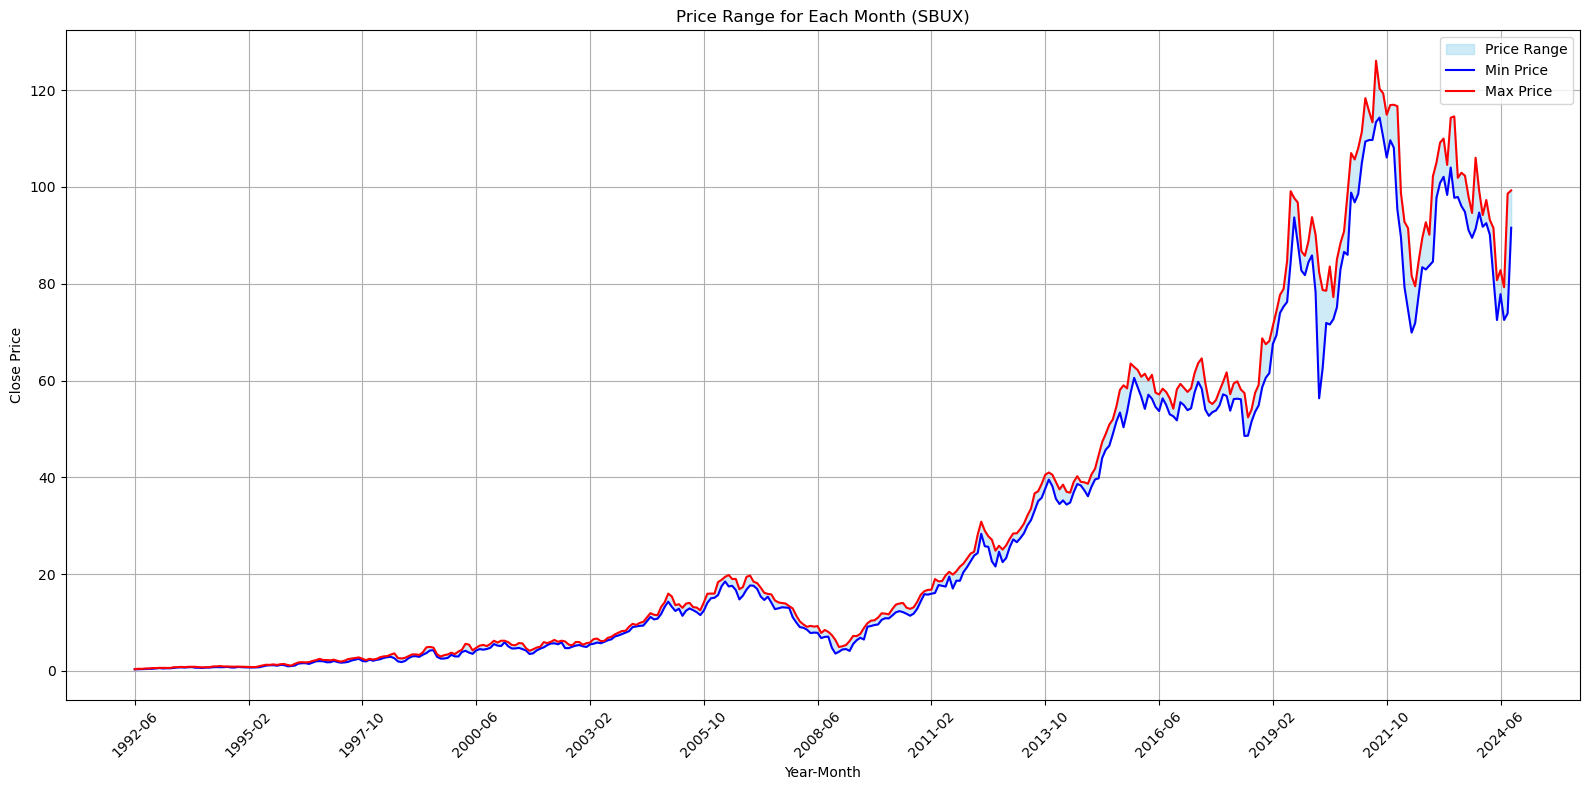

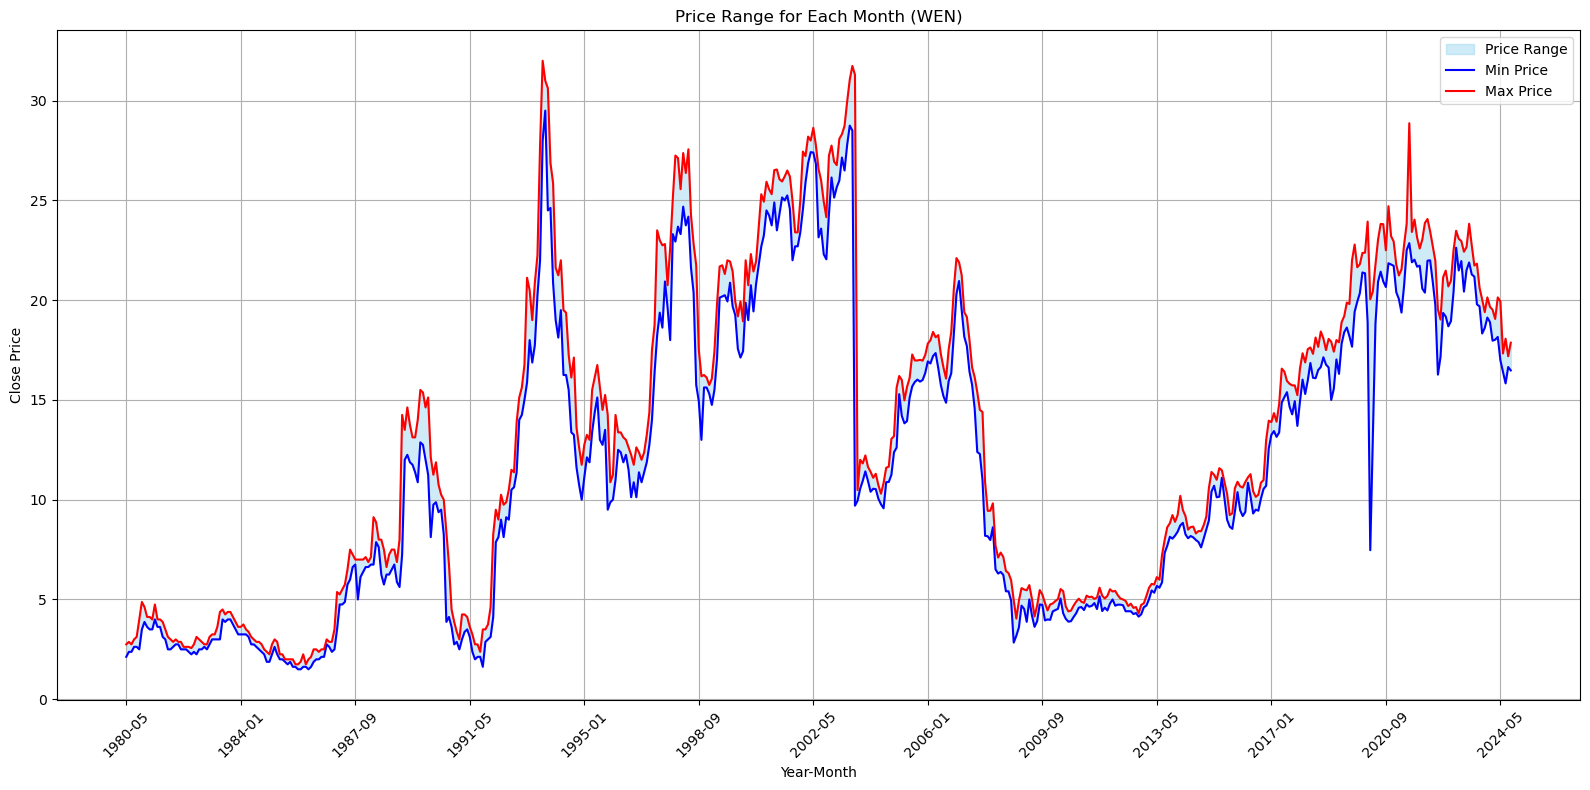

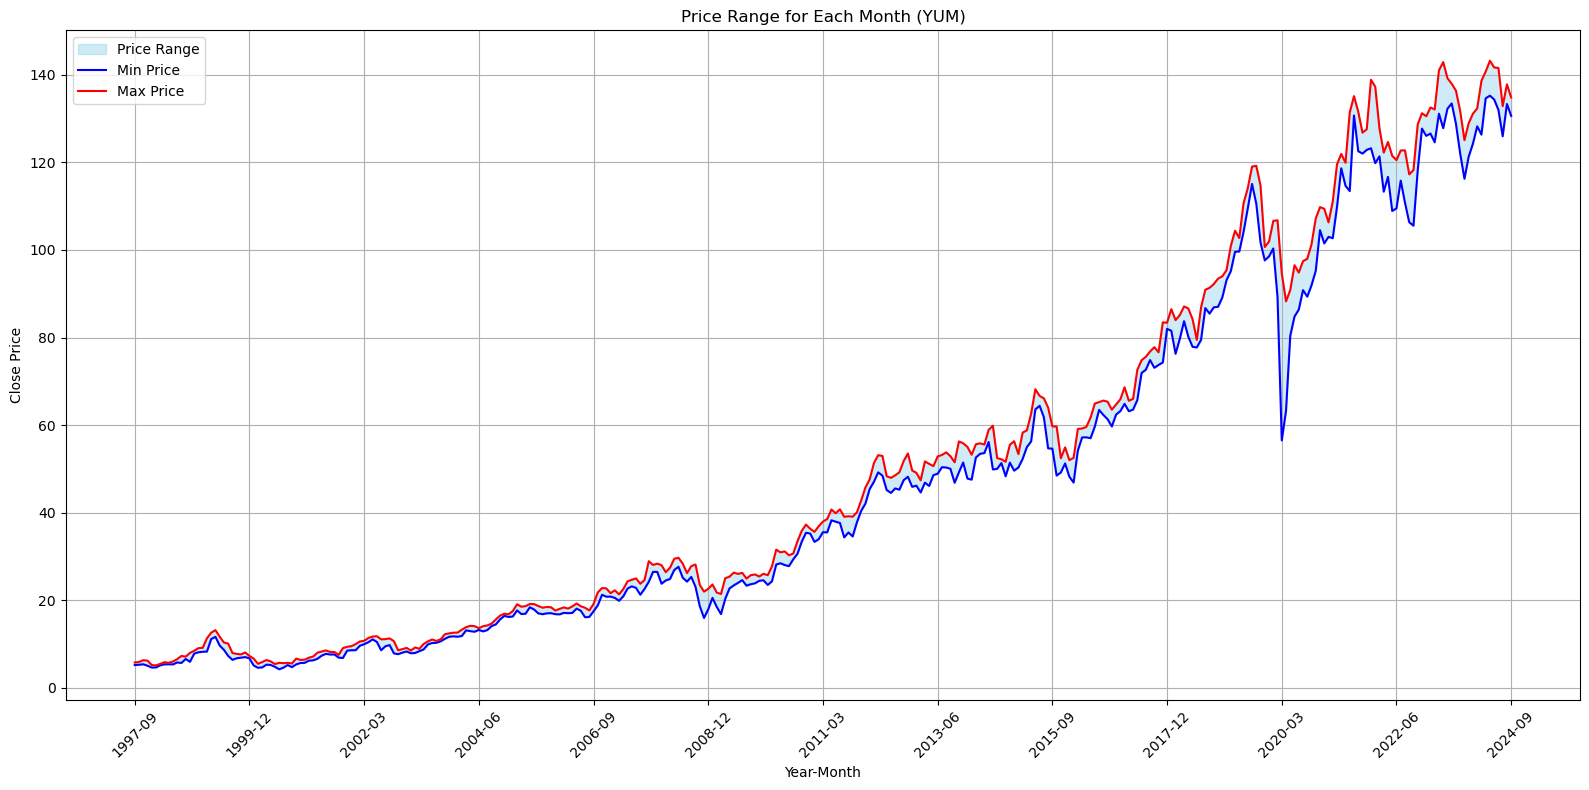

In [7]:
# 6

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():

    #Group by Year-Month
    data['YearMonth'] = data['Date'].dt.to_period('M')  # Year and Month combined for grouping

    # calculate range (min and max) of Close prices
    grouped_data = data.groupby('YearMonth')['Close'].agg(['min', 'max']).reset_index()

    # Plot the range for each month
    plt.figure(figsize=(16, 8))
    plt.fill_between(grouped_data['YearMonth'].astype(str), 
                     grouped_data['min'], 
                     grouped_data['max'], 
                     color='skyblue', alpha=0.4, label='Price Range')
    plt.plot(grouped_data['YearMonth'].astype(str), 
             grouped_data['min'], linestyle='-', color='blue', label='Min Price')
    plt.plot(grouped_data['YearMonth'].astype(str), 
             grouped_data['max'], linestyle='-', color='red', label='Max Price')

    # Chart details
    company_name = file_name.replace('.csv', '')  # Remove .csv extension for readability
    plt.title(f'Price Range for Each Month ({company_name})')
    plt.xlabel('Year-Month')
    plt.ylabel('Close Price')
    
    # Reduce the number of x-ticks dynamically
    step = max(1, len(grouped_data['YearMonth']) // 12)
    plt.xticks(ticks=range(0, len(grouped_data['YearMonth']), step), rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


Justify the chart selection:
The filled area makes the range of prices (min and max) for each month more visible, for easier observations of price fluctuations.
The line chart show the exact values for min and max prices.

<div class="alert alert-info"><b> Exercise 7 </b>

Create a plot showing the relationship between trading volume and the ```Close``` price for a selected
company. Add insights about the pattern, and, justify your chart selection.

</div>

Before proceeding with Exercise 7, we decided to conduct an additional analysis to select the most suitable company to represent the relationship between trading volume and the closing price. To achieve this, we adopted a data-driven approach: we calculated the correlation between these two variables for each company in the dataset. Correlation is a statistical measure that indicates the strength and direction of the relationship between two variables. We chose this criterion because a higher correlation suggests a clearer and more consistent relationship between trading volume and fluctuations in the closing price. This approach allows us to base our selection on an objective metric rather than relying on an arbitrary choice.

This preliminary step is important because it ensures that the resulting analysis and visualization are as meaningful as possible. If we were to select a company with little or no correlation, the scatter plot might fail to reveal a clear relationship between the variables, reducing the value of the analysis and complicating its interpretation.

In [8]:
# determine which is the best company based on the highest correlation coefficient. 

best_company = None
highest_correlation = -1

# Iterate through all companies to find the one with the strongest Volume-Close correlation
for company, data in data_dict.items():
    if 'Volume' in data.columns and 'Close' in data.columns:
        correlation = data['Volume'].corr(data['Close'])  # Calculate correlation
        print(f"Correlation for {company}: {correlation:.2f}")
        if abs(correlation) > highest_correlation:  # Check for the highest correlation
            highest_correlation = abs(correlation)
            best_company = company

print(f"\nBest company to represent: {best_company} with a correlation of {highest_correlation:.2f}")

Correlation for BRK-A.csv: -0.14
Correlation for DNUT.csv: 0.15
Correlation for DPZ.csv: 0.01
Correlation for LKNCY.csv: -0.08
Correlation for MCD.csv: 0.02
Correlation for PZZA.csv: -0.11
Correlation for QSR.csv: 0.02
Correlation for SBUX.csv: -0.31
Correlation for WEN.csv: -0.08
Correlation for YUM.csv: -0.39

Best company to represent: YUM.csv with a correlation of 0.39


After calculating the correlation for all the companies, we identified that **YUM.csv** is the best choice for Exercise 7. This is because it exhibits the highest absolute correlation between trading volume and closing price, with a value of **0.39**. Although this correlation is not exceptionally high, it is the most significant among all the companies evaluated. This result indicates that changes in YUM's trading volume have a relatively stronger relationship with changes in its closing price compared to other companies.

Selecting YUM for this analysis allows us to explore and visualize a clearer statistical relationship between these two financial variables. This choice ensures that the scatter plot developed in Exercise 7 is both representative and relevant. Additionally, it provides a meaningful example of how trading volume can be associated with price dynamics in the market. This approach not only reinforces the quality of the analysis but also enhances the interpretation of the results by relying on concrete and relevant data.

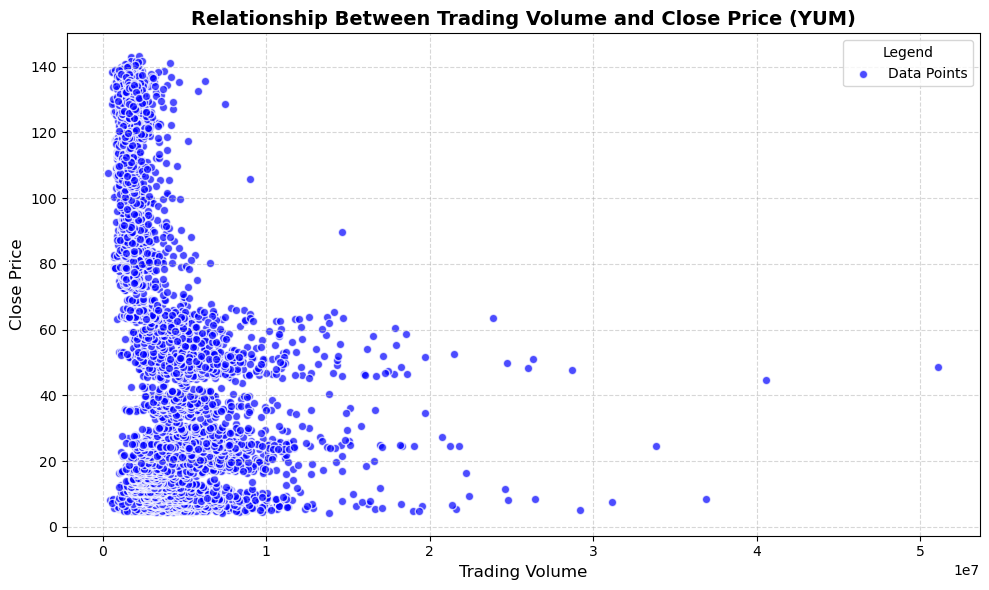

In [9]:
# 7

import matplotlib.pyplot as plt

# Specify the selected company (YUM.csv)
selected_company = "YUM.csv"
data = data_dict[selected_company]  # Load the dataset for the selected company

# Create a scatter plot to show the relationship between Volume and Close price
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], color='blue', edgecolors='white', alpha=0.7, label='Data Points')

# Chart details
company_name = selected_company.replace('.csv', '')  # Remove the .csv extension for readability
plt.title(f'Relationship Between Trading Volume and Close Price ({company_name})', fontsize=14, fontweight='bold')
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(title="Legend", fontsize=10)

# Optimize layout and show
plt.tight_layout()
plt.show()

The scatter plot provides a straightforward way to visualize the relationship between trading volume and the closing price. By plotting each data point individually, we can directly observe trends, outliers, and clusters within the dataset. While the overlap of points can sometimes obscure the finer details in areas of high concentration, this method effectively captures the raw, unprocessed nature of the data. It's particularly useful for presentations where simplicity and transparency of data representation are important. The scatter plot allows the audience to see exactly how each individual point contributes to the broader pattern, making it a more accessible choice for exploratory analysis.

<div class="alert alert-info"><b> Exercise 8 </b>


For each company, identify the month with the highest total trading volume and display the results
in a summary table, showing the month and total volume.

<div>

In [10]:
# Initialize an empty list to store summary data
summary_data = []

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    # Extract Year-Month for grouping
    data['YearMonth'] = data['Date'].dt.to_period('M')  # Year and Month combined for grouping
    
    # Group by YearMonth and calculate the total trading volume
    monthly_volume = data.groupby('YearMonth')['Volume'].sum().reset_index()
    
    # Find the month with the highest total trading volume
    max_volume_row = monthly_volume.loc[monthly_volume['Volume'].idxmax()]
    
    # Store the results in the summary data list
    company_name = file_name.replace('.csv', '')  # Remove the .csv extension for readability
    summary_data.append({
        'Company': company_name,
        'Month': max_volume_row['YearMonth'],
        'Total Volume': int(max_volume_row['Volume'])  # Convert to integer for better readability
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Apply formatting and ensure proper number representation
summary_df['Month'] = summary_df['Month'].dt.strftime('%B %Y')  # Format Month as "Month Year"
summary_df['Total Volume'] = summary_df['Total Volume'].apply(lambda x: f"{x:,}")  # Format with commas

# Apply styling to the summary table for better visualization
styled_summary = summary_df.style.set_caption("Summary Table of Highest Monthly Trading Volumes").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-size: 16px; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-size: 14px; font-weight: bold;'},
    {'selector': 'td', 'props': 'font-size: 12px; text-align: center;'}
])

# Display the styled table
styled_summary

In [11]:
data_dict

{'BRK-A.csv':             Date      Open      High       Low     Close     Adj Close  \
 0     1980-03-17     290.0     310.0     290.0     290.0  2.900000e+02   
 1     1980-03-18     290.0     290.0     290.0     290.0  2.900000e+02   
 2     1980-03-19     290.0     310.0     290.0     290.0  2.900000e+02   
 3     1980-03-20     290.0     290.0     290.0     290.0  2.900000e+02   
 4     1980-03-21     290.0     290.0     290.0     280.0  2.900000e+02   
 ...          ...       ...       ...       ...       ...           ...   
 11217 2024-09-13  677352.0  678234.0  671000.0  671750.0  6.717500e+05   
 11218 2024-09-16  673038.0  678827.0  671436.0  677731.0  6.777310e+05   
 11219 2024-09-17  680703.0       NaN  679124.0  685250.0  6.852500e+05   
 11220 2024-09-18  687500.0  688902.0  682214.0  686859.0  6.868590e+05   
 11221 2024-09-19  692979.0       NaN  686000.0  687840.0  1.197108e+06   
 
         Volume  Month  Year YearMonth  
 0      10000.0      3  1980   1980-03  
 1 

<div class="alert alert-info"><b> Exercise 9 </b>

Merge the datasets for all companies into a single dataset, one for each year. 
Print the structure of the combined dataset, ensuring proper alignment and handling of missing values.

<div>

In [12]:
# Merge all datasets into one DataFrame with appropriate column naming
merged_10dfs = pd.DataFrame()

for company, df in data_dict.items():
    company_name = company.split('.')[0] # Extract company name from filename
    df['Year'] = df['Date'].dt.year # Extract year from 'Date' column
    yearly_avg = df.groupby('Year').mean().add_prefix(f'{company_name}_') # Calculate yearly average for each company

    # Drop the 'Date', 'Year' and 'Month'(s) column for all companies
    drop_columns = [f'{company_name}_Date', f'{company_name}_Year', f'{company_name}_YearMonth', f'{company_name}_Month']
    yearly_avg = yearly_avg.drop(columns=[col for col in drop_columns if col in yearly_avg.columns])

    if merged_10dfs.empty: # If merged_data is empty, assign the first DataFrame to it
        merged_10dfs = yearly_avg 
    
    else: # Otherwise, merge the current DataFrame with merged_data
        merged_10dfs = pd.merge(merged_10dfs, yearly_avg, on='Year', how='outer')

In [13]:
merged_10dfs = merged_10dfs.sort_values(by='Year')
merged_10dfs.tail(20)

BRK-A_Open     BRK-A_High      BRK-A_Low    BRK-A_Close  \
Year                                                               
2005  118266.068219  100169.866938  113679.412051   85987.267857   
2006   99190.332423  108911.015533  140334.056809   94462.882470   
2007  130105.144374  139979.929844  179625.159193  116516.635458   
2008  171916.156904  137017.182310  142734.590809  122193.357708   
2009  134809.617625  139888.552383   97127.443210   93775.765873   
2010  154700.766222  132378.631501  147036.380181  117733.240079   
2011  144003.104754  153694.175454  160304.748576  116436.079365   
2012  143120.167983  148628.448694  146345.219849  125172.582000   
2013  178223.424104  192136.524198  190057.688517  165326.051587   
2014  221432.686846  213836.361795  214963.825320  195637.795635   
2015  243767.067618  228120.774085  221537.523328  210576.757937   
2016  239929.314199  241808.322215  226913.423260  216170.517857   
2017  282229.508062  291016.805893  288615.018469  262749.195219   
2018  313760.828108  330906.545321  341250.395792  305858.300797   
2019  333735.929477  335954.575751  332251.021492  312341.718254   
2020  329737.618686  328920.969029  319774.718644  307681.683794   
2021  437274.145851  449578.035962  417726.084547  410880.712302   
2022  471882.496420  480703.267222  477728.495127  458207.717131   
2023  527199.285746  536009.533713  511168.342116  509624.522000   
2024  651047.444229  648754.172539  630818.292359  622938.091160   

      BRK-A_Adj Close   BRK-A_Volume  DNUT_Open  DNUT_High   DNUT_Low  \
Year                                                                    
2005    122358.752435   38857.758621        NaN        NaN        NaN   
2006    108493.598100   39261.410788        NaN        NaN        NaN   
2007    138558.828879   45411.016949        NaN        NaN        NaN   
2008    131252.899994  102821.074380        NaN        NaN        NaN   
2009    121485.027783  100871.428571        NaN        NaN        NaN   
2010    157922.764643  138820.920502        NaN        NaN        NaN   
2011    130491.721327   56475.933610        NaN        NaN        NaN   
2012    162235.588768   57361.764706        NaN        NaN        NaN   
2013    186235.509207   27818.032787        NaN        NaN        NaN   
2014    216524.051027     349.790795        NaN        NaN        NaN   
2015    230443.724579     280.833333        NaN        NaN        NaN   
2016    261114.058827     326.250000        NaN        NaN        NaN   
2017    278099.413377     303.375527        NaN        NaN        NaN   
2018    332096.366155     341.250000        NaN        NaN        NaN   
2019    335165.767930     276.050420        NaN        NaN        NaN   
2020    325402.729742     628.085106        NaN        NaN        NaN   
2021    427933.131287    2046.610169  20.334250  19.972896  18.778836   
2022    474563.342933    2539.166667  18.908457  17.853773  16.144232   
2023    529475.371920    6583.750000  15.381915  16.086757  16.685825   
2024    648427.083875    8504.000000  13.677521  15.501759  15.686960   

      DNUT_Close  ...    WEN_Low  WEN_Close  WEN_Adj Close    WEN_Volume  \
Year              ...                                                      
2005         NaN  ...  17.336419  15.705714      11.191617  8.810466e+04   
2006         NaN  ...  19.505667  17.533068      11.908948  8.415188e+04   
2007         NaN  ...  18.524510  15.624980      12.147602  8.440042e+04   
2008         NaN  ...   7.785225   6.115573       5.099624  1.411961e+06   
2009         NaN  ...   7.564606   4.688452       3.498177  7.428405e+06   
2010         NaN  ...   7.048758   4.616548       3.979118  5.032689e+06   
2011         NaN  ...   8.856685   4.954425       4.522110  5.474350e+06   
2012         NaN  ...   8.649835   4.682460       4.144660  3.335667e+06   
2013         NaN  ...   8.173148   6.809464       6.459605  5.244146e+06   
2014         NaN  ...  13.232881   8.548452       7.679179  5.974531e

In [14]:
# Print structure of the combined dataset
print(merged_10dfs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1966 to 2024
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BRK-A_Open       45 non-null     float64
 1   BRK-A_High       45 non-null     float64
 2   BRK-A_Low        45 non-null     float64
 3   BRK-A_Close      45 non-null     float64
 4   BRK-A_Adj Close  45 non-null     float64
 5   BRK-A_Volume     45 non-null     float64
 6   DNUT_Open        4 non-null      float64
 7   DNUT_High        4 non-null      float64
 8   DNUT_Low         4 non-null      float64
 9   DNUT_Close       4 non-null      float64
 10  DNUT_Adj Close   4 non-null      float64
 11  DNUT_Volume      4 non-null      float64
 12  DPZ_Open         21 non-null     float64
 13  DPZ_High         21 non-null     float64
 14  DPZ_Low          21 non-null     float64
 15  DPZ_Close        21 non-null     float64
 16  DPZ_Adj Close    21 non-null     float64
 17  DPZ_Volume       2

In [15]:
# Create a new variable for the modified DataFrame
modified_10dfs = merged_10dfs.copy()

modified_10dfs.tail(20)

BRK-A_Open     BRK-A_High      BRK-A_Low    BRK-A_Close  \
Year                                                               
2005  118266.068219  100169.866938  113679.412051   85987.267857   
2006   99190.332423  108911.015533  140334.056809   94462.882470   
2007  130105.144374  139979.929844  179625.159193  116516.635458   
2008  171916.156904  137017.182310  142734.590809  122193.357708   
2009  134809.617625  139888.552383   97127.443210   93775.765873   
2010  154700.766222  132378.631501  147036.380181  117733.240079   
2011  144003.104754  153694.175454  160304.748576  116436.079365   
2012  143120.167983  148628.448694  146345.219849  125172.582000   
2013  178223.424104  192136.524198  190057.688517  165326.051587   
2014  221432.686846  213836.361795  214963.825320  195637.795635   
2015  243767.067618  228120.774085  221537.523328  210576.757937   
2016  239929.314199  241808.322215  226913.423260  216170.517857   
2017  282229.508062  291016.805893  288615.018469  262749.195219   
2018  313760.828108  330906.545321  341250.395792  305858.300797   
2019  333735.929477  335954.575751  332251.021492  312341.718254   
2020  329737.618686  328920.969029  319774.718644  307681.683794   
2021  437274.145851  449578.035962  417726.084547  410880.712302   
2022  471882.496420  480703.267222  477728.495127  458207.717131   
2023  527199.285746  536009.533713  511168.342116  509624.522000   
2024  651047.444229  648754.172539  630818.292359  622938.091160   

      BRK-A_Adj Close   BRK-A_Volume  DNUT_Open  DNUT_High   DNUT_Low  \
Year                                                                    
2005    122358.752435   38857.758621        NaN        NaN        NaN   
2006    108493.598100   39261.410788        NaN        NaN        NaN   
2007    138558.828879   45411.016949        NaN        NaN        NaN   
2008    131252.899994  102821.074380        NaN        NaN        NaN   
2009    121485.027783  100871.428571        NaN        NaN        NaN   
2010    157922.764643  138820.920502        NaN        NaN        NaN   
2011    130491.721327   56475.933610        NaN        NaN        NaN   
2012    162235.588768   57361.764706        NaN        NaN        NaN   
2013    186235.509207   27818.032787        NaN        NaN        NaN   
2014    216524.051027     349.790795        NaN        NaN        NaN   
2015    230443.724579     280.833333        NaN        NaN        NaN   
2016    261114.058827     326.250000        NaN        NaN        NaN   
2017    278099.413377     303.375527        NaN        NaN        NaN   
2018    332096.366155     341.250000        NaN        NaN        NaN   
2019    335165.767930     276.050420        NaN        NaN        NaN   
2020    325402.729742     628.085106        NaN        NaN        NaN   
2021    427933.131287    2046.610169  20.334250  19.972896  18.778836   
2022    474563.342933    2539.166667  18.908457  17.853773  16.144232   
2023    529475.371920    6583.750000  15.381915  16.086757  16.685825   
2024    648427.083875    8504.000000  13.677521  15.501759  15.686960   

      DNUT_Close  ...    WEN_Low  WEN_Close  WEN_Adj Close    WEN_Volume  \
Year              ...                                                      
2005         NaN  ...  17.336419  15.705714      11.191617  8.810466e+04   
2006         NaN  ...  19.505667  17.533068      11.908948  8.415188e+04   
2007         NaN  ...  18.524510  15.624980      12.147602  8.440042e+04   
2008         NaN  ...   7.785225   6.115573       5.099624  1.411961e+06   
2009         NaN  ...   7.564606   4.688452       3.498177  7.428405e+06   
2010         NaN  ...   7.048758   4.616548       3.979118  5.032689e+06   
2011         NaN  ...   8.856685   4.954425       4.522110  5.474350e+06   
2012         NaN  ...   8.649835   4.682460       4.144660  3.335667e+06   
2013         NaN  ...   8.173148   6.809464       6.459605  5.244146e+06   
2014         NaN  ...  13.232881   8.548452       7.679179  5.974531e

#### Using ARIMA for Backcasting Missing Values (Auto-Regressive Integrated Moving Average)
We employed ARIMA for backcasting missing values in our time-series data due to its ability to model temporal dependencies and handle non-stationary data. To optimize the parameters inherent in ARIMA, we utilized auto_arima, which selects the best configuration automatically.

1. **Time-Series Dependency:** ARIMA models capture temporal patterns by incorporating:

- **Auto-Regressive (AR) Order:** The influence of past values on the current prediction. This is usually manually captured with the parameter (p).
- **Moving Average (MA) Order:** The influence of past forecast errors on predictions. This makes ARIMA particularly effective for sequential time-series data like stock prices. This is usually manually captured with the parameter (q). 

2. **Stationarity Handling:** The Differencing (d) component in ARIMA transforms non-stationary data into a stationary series by removing trends or seasonality. This ensures that the model focuses on the core structure of the data rather than being distorted by external patterns or noise.

3. **Parameter Optimization:** By using auto_arima, we automate the selection of the optimal ARIMA parameters (p, d, q), reducing the need for manual tuning while ensuring the model adapts effectively to the characteristics of the dataset.

However, ARIMA with automatic parameter selection does not fully address two key challenges in backcasting. To mitigate these issues, we introduced additional adjustments in our solution:

1. **Smoothing Jumps:** We applied a custom smoothing mechanism to limit abrupt changes in the backcasted values, ensuring smoother transitions between predictions. (We set this limit to be 100% increase or decrease from the current value, but there would be some exceptions due to issues like Data Sparsity, Failure to Stabilize Non-Stationary Data with Differencing Parameter, and High Volatility)
2. **Avoiding Negative Predictions:** We enforced a non-negative floor for backcasted values, as negative stock prices are not meaningful in this context.
This approach enhances ARIMA's capabilities for backcasting and ensures more realistic imputed values, as detailed in the code below.

In [16]:
# Import necessary libraries
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [17]:
# Define optimized ARIMA backcasting function
def backcast_arima(series):
    if series.isna().sum() > 0:
        # Convert series to numeric to avoid type errors
        numeric_series = pd.to_numeric(series, errors='coerce')
        
        # Return the original series if it contains no valid numeric data
        if numeric_series.dropna().empty:
            return series

        # Optimize ARIMA parameters using auto_arima
        auto_model = auto_arima(numeric_series.dropna(), seasonal=False, suppress_warnings=True, stepwise=True)
        model = ARIMA(numeric_series.dropna(), order=auto_model.order)
        fit = model.fit()
        backcast = fit.predict(start=0, end=len(numeric_series)-1)
        backcast[backcast < 0] = 0  # Replace negative values with 0

        # Smooth large jumps by averaging with neighbors, where difference is capped at 100% of the previous value
        window_size = 3
        for i in range(window_size, len(backcast)):
            prev_mean = backcast[i-window_size:i].mean()
            if abs(backcast[i] - prev_mean) > abs(prev_mean):
                backcast[i] = (prev_mean + backcast[i]) / 2

        # Additional Scaling: Ensure values are scaled within the range of original data
        original_min = numeric_series.min()
        original_max = numeric_series.max()
        backcast = np.clip(backcast, original_min, original_max)

        # Manually cap forecast jumps: Limit changes to 50% of the overall range
        max_jump = 0.5 * (original_max - original_min)
        for i in range(1, len(backcast)):
            if abs(backcast[i] - backcast[i - 1]) > max_jump:
                backcast[i] = backcast[i - 1] + np.sign(backcast[i] - backcast[i - 1]) * max_jump

        # Update only the backcasted values
        series.iloc[:len(backcast)] = backcast
    
    return series

In [18]:
# Backcast missing data before the first available year
for column in merged_10dfs.columns:
    if column != 'Year':  # Skip the Year column
        first_valid_idx = merged_10dfs[column].first_valid_index()
        if first_valid_idx is not None and first_valid_idx > 0:
            series_to_backcast = merged_10dfs[column].iloc[:first_valid_idx]
            backcasted_series = backcast_arima(series_to_backcast)
            modified_10dfs.loc[:first_valid_idx - 1, column] = backcasted_series

modified_10dfs.tail(20)

c:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, ca

BRK-A_Open     BRK-A_High      BRK-A_Low    BRK-A_Close  \
Year                                                               
2005  118266.068219  100169.866938  113679.412051   85987.267857   
2006   99190.332423  108911.015533  140334.056809   94462.882470   
2007  130105.144374  139979.929844  179625.159193  116516.635458   
2008  171916.156904  137017.182310  142734.590809  122193.357708   
2009  134809.617625  139888.552383   97127.443210   93775.765873   
2010  154700.766222  132378.631501  147036.380181  117733.240079   
2011  144003.104754  153694.175454  160304.748576  116436.079365   
2012  143120.167983  148628.448694  146345.219849  125172.582000   
2013  178223.424104  192136.524198  190057.688517  165326.051587   
2014  221432.686846  213836.361795  214963.825320  195637.795635   
2015  243767.067618  228120.774085  221537.523328  210576.757937   
2016  239929.314199  241808.322215  226913.423260  216170.517857   
2017  282229.508062  291016.805893  288615.018469  262749.195219   
2018  313760.828108  330906.545321  341250.395792  305858.300797   
2019  333735.929477  335954.575751  332251.021492  312341.718254   
2020  329737.618686  328920.969029  319774.718644  307681.683794   
2021  437274.145851  449578.035962  417726.084547  410880.712302   
2022  471882.496420  480703.267222  477728.495127  458207.717131   
2023  527199.285746  536009.533713  511168.342116  509624.522000   
2024  651047.444229  648754.172539  630818.292359  622938.091160   

      BRK-A_Adj Close   BRK-A_Volume  DNUT_Open  DNUT_High   DNUT_Low  \
Year                                                                    
2005    122358.752435   38857.758621  17.075531  17.353791  16.713193   
2006    108493.598100   39261.410788  17.075531  17.353791  16.713193   
2007    138558.828879   45411.016949  17.075531  17.353791  16.713193   
2008    131252.899994  102821.074380  17.075531  17.353791  16.713193   
2009    121485.027783  100871.428571  17.075531  17.353791  16.713193   
2010    157922.764643  138820.920502  17.075531  17.353791  16.713193   
2011    130491.721327   56475.933610  17.075531  17.353791  16.713193   
2012    162235.588768   57361.764706  17.075531  17.353791  16.713193   
2013    186235.509207   27818.032787  17.075531  17.353791  16.713193   
2014    216524.051027     349.790795  17.075531  17.353791  16.713193   
2015    230443.724579     280.833333  17.075531  17.353791  16.713193   
2016    261114.058827     326.250000  17.075531  17.353791  16.713193   
2017    278099.413377     303.375527  17.075531  17.353791  16.713193   
2018    332096.366155     341.250000  17.075531  17.353791  16.713193   
2019    335165.767930     276.050420  17.075531  17.353791  16.713193   
2020    325402.729742     628.085106  17.075531  17.353791  16.713193   
2021    427933.131287    2046.610169  20.334250  19.972896  18.778836   
2022    474563.342933    2539.166667  18.908457  17.853773  16.144232   
2023    529475.371920    6583.750000  15.381915  16.086757  16.685825   
2024    648427.083875    8504.000000  13.677521  15.501759  15.686960   

      DNUT_Close  ...    WEN_Low  WEN_Close  WEN_Adj Close    WEN_Volume  \
Year              ...                                                      
2005   13.817473  ...  17.336419  15.705714      11.191617  8.810466e+04   
2006   13.817473  ...  19.505667  17.533068      11.908948  8.415188e+04   
2007   13.817473  ...  18.524510  15.624980      12.147602  8.440042e+04   
2008   13.817473  ...   7.785225   6.115573       5.099624  1.411961e+06   
2009   13.817473  ...   7.564606   4.688452       3.498177  7.428405e+06   
2010   13.817473  ...   7.048758   4.616548       3.979118  5.032689e+06   
2011   13.817473  ...   8.856685   4.954425       4.522110  5.474350e+06   
2012   13.817473  ...   8.649835   4.682460       4.144660  3.335667e+06   
2013   13.817473  ...   8.173148   6.809464       6.459605  5.244146e+06   
2014   13.817473  ...  13.232881   8.548452       7.679179  5.974531e

In [19]:
# Reset index to ensure 'Year' is a column
modified_10dfs = modified_10dfs.reset_index()
modified_10dfs.tail(20)

Year     BRK-A_Open     BRK-A_High      BRK-A_Low    BRK-A_Close  \
39  2005  118266.068219  100169.866938  113679.412051   85987.267857   
40  2006   99190.332423  108911.015533  140334.056809   94462.882470   
41  2007  130105.144374  139979.929844  179625.159193  116516.635458   
42  2008  171916.156904  137017.182310  142734.590809  122193.357708   
43  2009  134809.617625  139888.552383   97127.443210   93775.765873   
44  2010  154700.766222  132378.631501  147036.380181  117733.240079   
45  2011  144003.104754  153694.175454  160304.748576  116436.079365   
46  2012  143120.167983  148628.448694  146345.219849  125172.582000   
47  2013  178223.424104  192136.524198  190057.688517  165326.051587   
48  2014  221432.686846  213836.361795  214963.825320  195637.795635   
49  2015  243767.067618  228120.774085  221537.523328  210576.757937   
50  2016  239929.314199  241808.322215  226913.423260  216170.517857   
51  2017  282229.508062  291016.805893  288615.018469  262749.195219   
52  2018  313760.828108  330906.545321  341250.395792  305858.300797   
53  2019  333735.929477  335954.575751  332251.021492  312341.718254   
54  2020  329737.618686  328920.969029  319774.718644  307681.683794   
55  2021  437274.145851  449578.035962  417726.084547  410880.712302   
56  2022  471882.496420  480703.267222  477728.495127  458207.717131   
57  2023  527199.285746  536009.533713  511168.342116  509624.522000   
58  2024  651047.444229  648754.172539  630818.292359  622938.091160   

    BRK-A_Adj Close   BRK-A_Volume  DNUT_Open  DNUT_High   DNUT_Low  ...  \
39    122358.752435   38857.758621  17.075531  17.353791  16.713193  ...   
40    108493.598100   39261.410788  17.075531  17.353791  16.713193  ...   
41    138558.828879   45411.016949  17.075531  17.353791  16.713193  ...   
42    131252.899994  102821.074380  17.075531  17.353791  16.713193  ...   
43    121485.027783  100871.428571  17.075531  17.353791  16.713193  ...   
44    157922.764643  138820.920502  17.075531  17.353791  16.713193  ...   
45    130491.721327   56475.933610  17.075531  17.353791  16.713193  ...   
46    162235.588768   57361.764706  17.075531  17.353791  16.713193  ...   
47    186235.509207   27818.032787  17.075531  17.353791  16.713193  ...   
48    216524.051027     349.790795  17.075531  17.353791  16.713193  ...   
49    230443.724579     280.833333  17.075531  17.353791  16.713193  ...   
50    261114.058827     326.250000  17.075531  17.353791  16.713193  ...   
51    278099.413377     303.375527  17.075531  17.353791  16.713193  ...   
52    332096.366155     341.250000  17.075531  17.353791  16.713193  ...   
53    335165.767930     276.050420  17.075531  17.353791  16.713193  ...   
54    325402.729742     628.085106  17.075531  17.353791  16.713193  ...   
55    427933.131287    2046.610169  20.334250  19.972896  18.778836  ...   
56    474563.342933    2539.166667  18.908457  17.853773  16.144232  ...   
57    529475.371920    6583.750000  15.381915  16.086757  16.685825  ...   
58    648427.083875    8504.000000  13.677521  15.501759  15.686960  ...   

      WEN_Low  WEN_Close  WEN_Adj Close    WEN_Volume    YUM_Open    YUM_High  \
39  17.336419  15.705714      11.191617  8.810466e+04   29.729851   25.793263   
40  19.505667  17.533068      11.908948  8.415188e+04   40.488389   22.982962   
41  18.524510  15.624980      12.147602  8.440042e+04   43.403561   34.014484   
42   7.785225   6.115573       5.099624  1.411961e+06   28.830582   39.023530   
43   7.564606   4.688452       3.498177  7.428405e+06   27.441908   41.554484   
44   7.048758   4.616548       3.979118  5.032689e+06   47.471093   42.290039   
45   8.856685   4.954425       4.522110  5.474350e+06   43.630063   55.826320   
46   8.649835   4.682460       4.144660  3.335667e+06   65.311307   59.813695   
47   8.173148   6.809464       6.459605  5.244146e+06   55.628511   65.376827   
48  13.232881   8.548452       7.679179  5.974531e+06   73.178173   61.194270   
49 

In [20]:
# Print structure of the modified DataFrame
print(modified_10dfs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             59 non-null     int32  
 1   BRK-A_Open       59 non-null     float64
 2   BRK-A_High       59 non-null     float64
 3   BRK-A_Low        59 non-null     float64
 4   BRK-A_Close      59 non-null     float64
 5   BRK-A_Adj Close  59 non-null     float64
 6   BRK-A_Volume     59 non-null     float64
 7   DNUT_Open        59 non-null     float64
 8   DNUT_High        59 non-null     float64
 9   DNUT_Low         59 non-null     float64
 10  DNUT_Close       59 non-null     float64
 11  DNUT_Adj Close   59 non-null     float64
 12  DNUT_Volume      59 non-null     float64
 13  DPZ_Open         59 non-null     float64
 14  DPZ_High         59 non-null     float64
 15  DPZ_Low          59 non-null     float64
 16  DPZ_Close        59 non-null     float64
 17  DPZ_Adj Close    5

In [21]:
# Check for no missing values
modified_10dfs.isna().sum().sum()

0

In [22]:
pd.set_option('display.max_columns', None)
modified_10dfs

Year     BRK-A_Open     BRK-A_High      BRK-A_Low    BRK-A_Close  \
0   1966   19939.573500   22123.547514   18754.909595     353.109453   
1   1967   41624.380511   35560.699123   37615.205439     561.873663   
2   1968   36230.534773   60188.155790   81393.316320     538.508958   
3   1969   54811.573879   54472.204636   42298.668562     582.482732   
4   1970   53775.562457   46404.203550   29134.304365     919.503637   
5   1971   41875.598660   36628.838422   35425.284052    1038.469267   
6   1972   19939.573500   33944.370497   36354.041899    1691.450838   
7   1973   30582.054630   43018.424608   59724.392160    2208.430501   
8   1974   48460.019430   22123.547514   35072.713934    2889.683100   
9   1975   43841.836527   42404.420877   18754.909595    3523.264289   
10  1976   56172.406206   22123.547514   37793.259528    5494.361465   
11  1977   49517.455805   37744.235125   37637.666265    7321.237610   
12  1978   41744.694707   55830.097056   46533.243713   10534.202795   
13  1979   44971.765250   62140.260325   56673.155095    9752.239953   
14  1980   31291.592448   25226.528631   24909.815272     353.109453   
15  1981   20581.891832   50741.682859   60537.720539     493.221344   
16  1982   80224.869675   30949.715679   34703.103626     541.304348   
17  1983   21190.135075   36796.589917   25628.533899    1029.693676   
18  1984   30304.539201   46683.560659   31412.304828    1283.013834   
19  1985   31952.298841   27731.621552   32873.607117    1982.704365   
20  1986   32722.436341   42564.558301   52930.761211    2776.754941   
21  1987   52523.864221   23657.884683   33392.148085    3443.478261   
22  1988   33738.701330   38823.781902   18754.909595    4048.666008   
23  1989   56308.227676   22123.547514   35755.760180    6798.803571   
24  1990   45565.199579   46249.397987   35944.738705    6873.330040   
25  1991   33268.756029   57779.561513   56886.565460    8229.071146   
26  1992   54412.168415   43733.300083   53085.676404    9347.362205   
27  1993   19939.573500   59789.670823   64608.883573   15010.286561   
28  1994   57468.421411   37741.204010   42042.563348   17691.507937   
29  1995   40330.168171   59696.420660   64402.503454   25517.509921   
30  1996   75750.578209   71539.580695   46604.037082   32682.677165   
31  1997   76526.627697   70506.932517   76372.294331   41950.760870   
32  1998   98456.355079  108329.149990   88436.786569   65228.769841   
33  1999  104329.377256  101231.229747  108028.497359   66589.801587   
34  2000   61898.052621  105781.828692   84710.627569   57303.799603   
35  2001   97112.555322  107390.849828   87256.060267   68754.778226   
36  2002  115108.548873   87387.515666   85579.049681   72347.500000   
37  2003   97190.919895   83358.600751  100770.689810   73409.007937   
38  2004  112597.056239  116786.746158  115399.764499   88331.962302   
39  2005  118266.068219  100169.866938  113679.412051   85987.267857   
40  2006   99190.332423  108911.015533  140334.056809   94462.882470   
41  2007  130105.144374  139979.929844  179625.159193  116516.635458   
42  2008  171916.156904  137017.182310  142734.590809  122193.357708   
43  2009  134809.617625  139888.552383   97127.443210   93775.765873   
44  2010  154700.766222  132378.631501  147036.380181  117733.240079   
45  2011  144003.104754  153694.175454  160304.748576  116436.079365   
46  2012  143120.167983  148628.448694  146345.219849  125172.582000   
47  2013  178223.424104  192136.524198  190057.688517  165326.051587   
48  2014  221432.686846  213836.361795  214963.825320  195637.795635   
49  2015  243767.067618  228120.774085  221537.523328  210576.757937   
50  2016  239929.314199  241808.322215  226913.423260  216170.517857   
51  2017  282229.508062  291016.805893  288615.018469  262749.195219   
52  2018  313760.828108  330906.545321  341250.395792  305858.300797   
53  2019  333735.929477  335954.575751  332251.021492  312341.718254   
54  2020  329737.618686  328920.969029  3197

In [23]:
# Generate graphs for each metric
metrics_q9 = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']

# Debug column names
print("Columns in modified_10dfs:", modified_10dfs.columns.tolist())

Columns in modified_10dfs: ['Year', 'BRK-A_Open', 'BRK-A_High', 'BRK-A_Low', 'BRK-A_Close', 'BRK-A_Adj Close', 'BRK-A_Volume', 'DNUT_Open', 'DNUT_High', 'DNUT_Low', 'DNUT_Close', 'DNUT_Adj Close', 'DNUT_Volume', 'DPZ_Open', 'DPZ_High', 'DPZ_Low', 'DPZ_Close', 'DPZ_Adj Close', 'DPZ_Volume', 'LKNCY_Open', 'LKNCY_High', 'LKNCY_Low', 'LKNCY_Close', 'LKNCY_Adj Close', 'LKNCY_Volume', 'MCD_Open', 'MCD_High', 'MCD_Low', 'MCD_Close', 'MCD_Adj Close', 'MCD_Volume', 'PZZA_Open', 'PZZA_High', 'PZZA_Low', 'PZZA_Close', 'PZZA_Adj Close', 'PZZA_Volume', 'QSR_Open', 'QSR_High', 'QSR_Low', 'QSR_Close', 'QSR_Adj Close', 'QSR_Volume', 'SBUX_Open', 'SBUX_High', 'SBUX_Low', 'SBUX_Close', 'SBUX_Adj Close', 'SBUX_Volume', 'WEN_Open', 'WEN_High', 'WEN_Low', 'WEN_Close', 'WEN_Adj Close', 'WEN_Volume', 'YUM_Open', 'YUM_High', 'YUM_Low', 'YUM_Close', 'YUM_Adj Close', 'YUM_Volume']


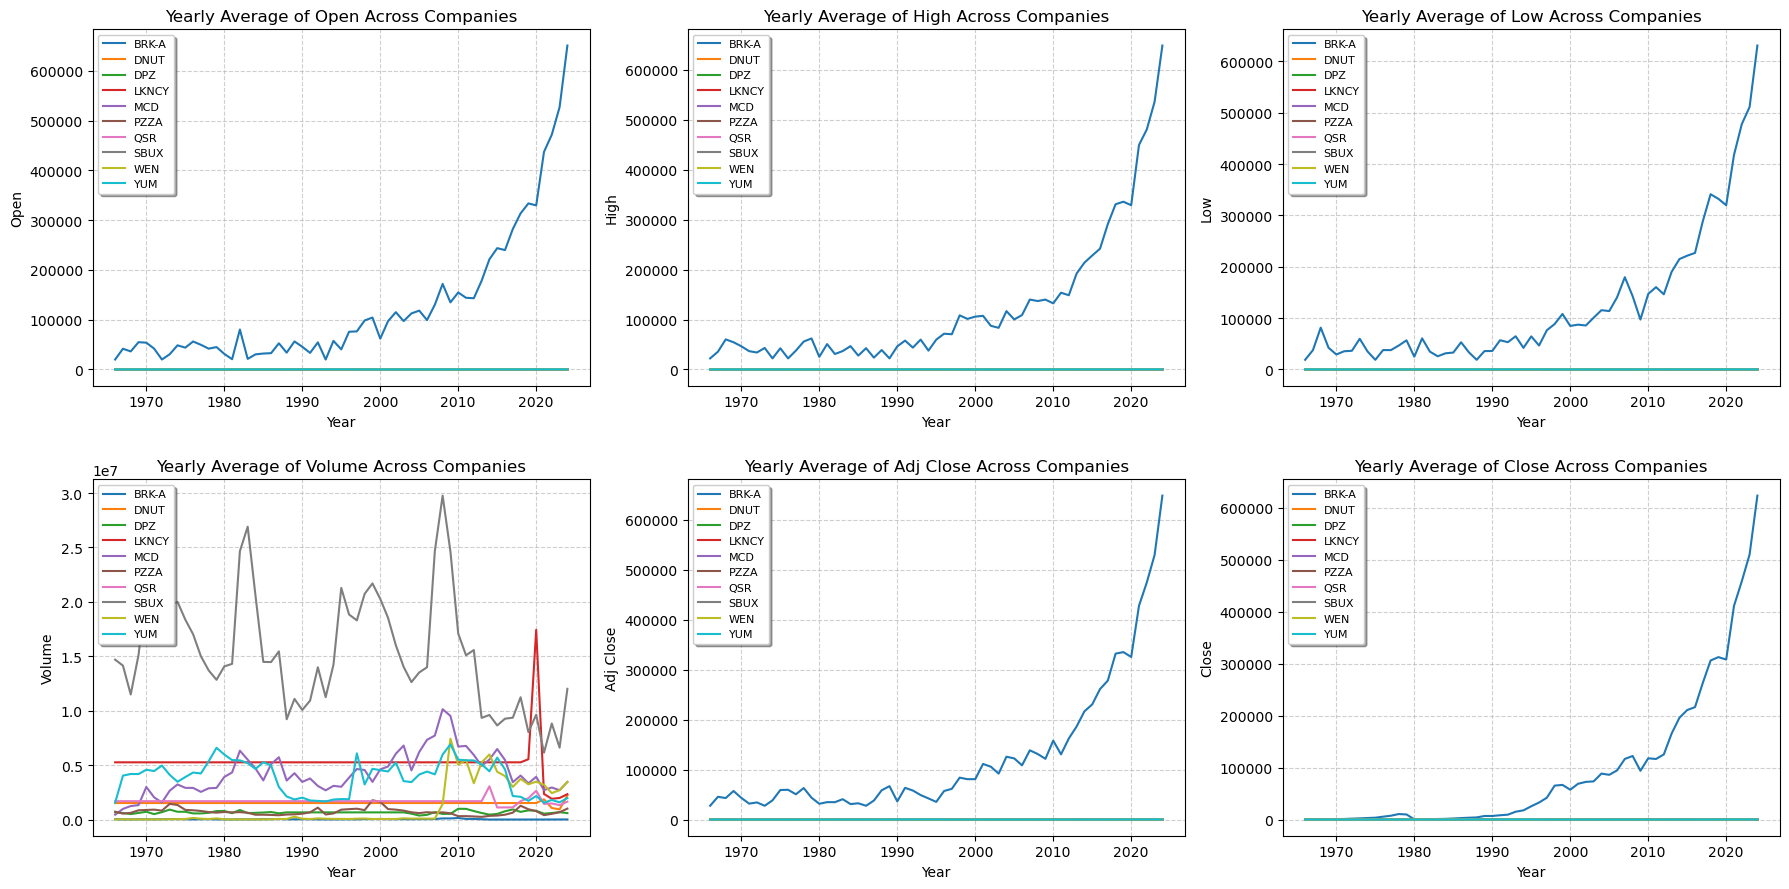

In [24]:
# Create subplots: 2 rows, 3 columns for 6 plots
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each metric on a different subplot
for idx, metric in enumerate(metrics_q9):
    ax = axes[idx]
    found_data = False  # Flag to check if data is found for plotting
    
    for column in modified_10dfs.columns:
        # Match exact metric names, handle spaces
        if column.split('_')[-1] == metric:
            company_name = column.split('_')[0]  # Extract company name from column name
            ax.plot(modified_10dfs['Year'], modified_10dfs[column], label=company_name) 
            found_data = True  # Data found for plotting

    if found_data:
        ax.set_title(f'Yearly Average of {metric} Across Companies')
        ax.set_xlabel('Year')
        ax.set_ylabel(metric)
        ax.legend(loc='upper left', fontsize=8, frameon=True, fancybox=True, shadow=True)
        ax.grid(True, linestyle='--', alpha=0.6)
    else:
        ax.set_title(f'No data found for {metric}')
        ax.axis('off')  # Hide the axis if no data found

# Adjust layout and show the entire figure
plt.tight_layout()
plt.show()

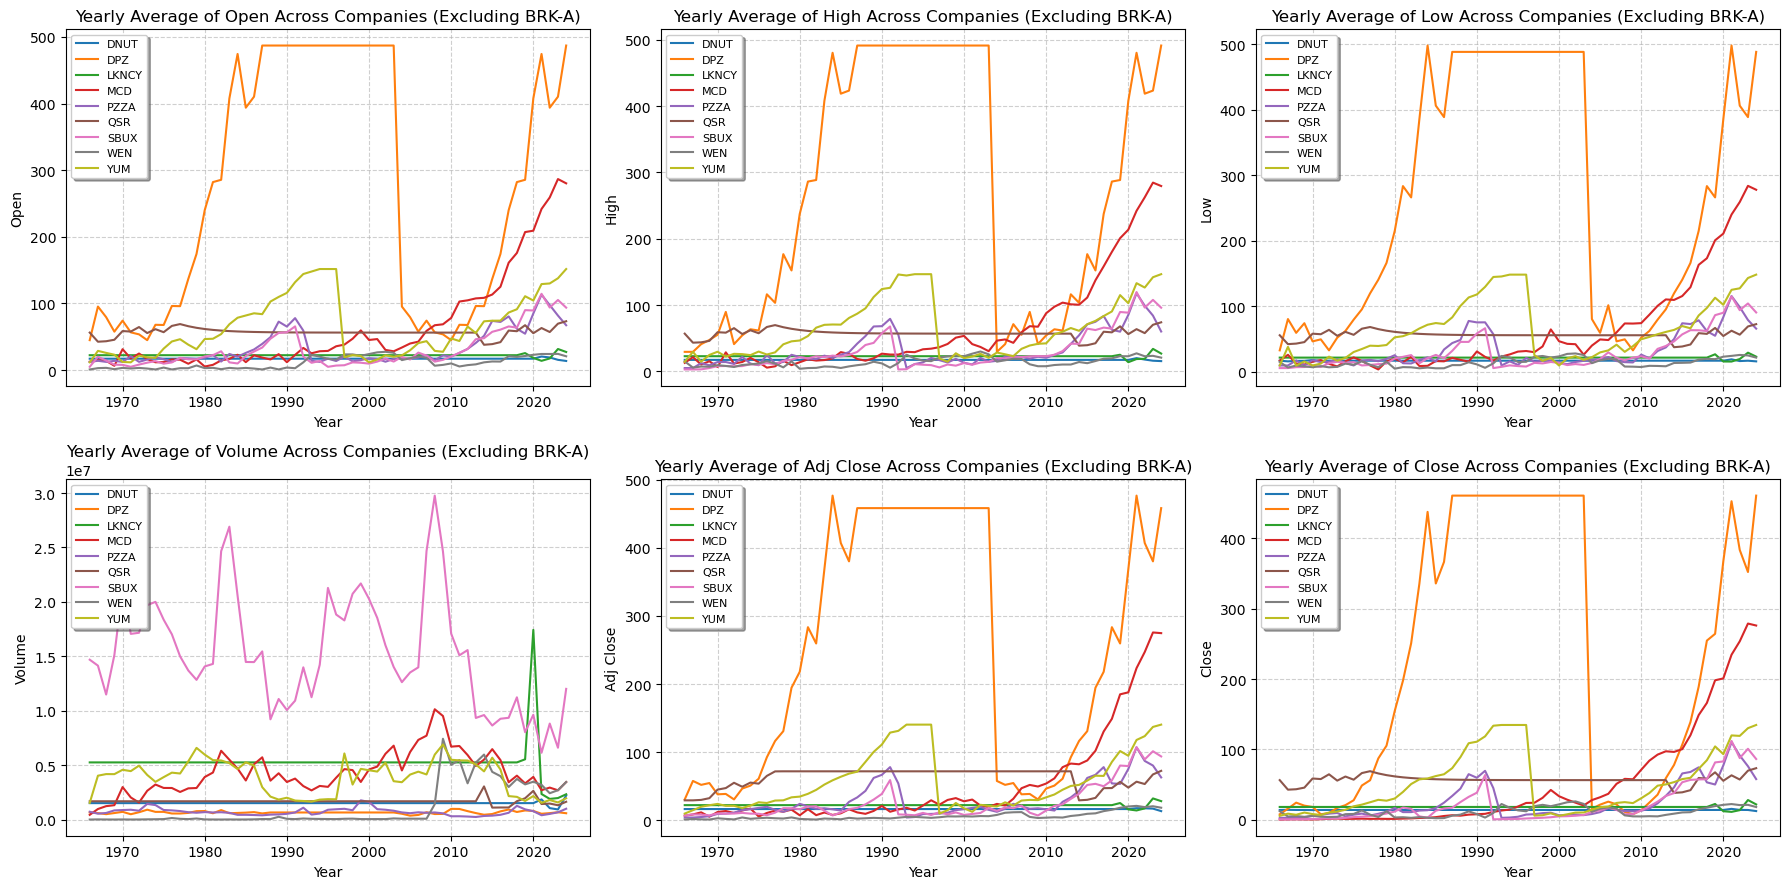

In [25]:
# Create subplots: 2 rows, 3 columns for 6 plots (excluding BRK-A)
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each metric on a different subplot
for idx, metric in enumerate(metrics_q9):
    ax = axes[idx]
    found_data = False  # Flag to check if data is found for plotting
    
    for column in modified_10dfs.columns:
        # Exclude BRK-A and match exact metric names
        if 'BRK-A' not in column and column.split('_')[-1] == metric:
            company_name = column.split('_')[0]  # Extract company name from column name
            ax.plot(modified_10dfs['Year'], modified_10dfs[column], label=company_name) 
            found_data = True  # Data found for plotting

    if found_data:
        ax.set_title(f'Yearly Average of {metric} Across Companies (Excluding BRK-A)')
        ax.set_xlabel('Year')
        ax.set_ylabel(metric)
        ax.legend(loc='upper left', fontsize=8, frameon=True, fancybox=True, shadow=True)
        ax.grid(True, linestyle='--', alpha=0.6)
    else:
        ax.set_title(f'No data found for {metric}')
        ax.axis('off')  # Hide the axis if no data found

# Adjust layout and show the entire figure
plt.tight_layout()
plt.show()

<div class="alert alert-info"><b> Exercise 10 </b>

For each company:

• Calculate the spread between the High and Low prices for each day

• Compute the average spread for each company and visualize the result in a chart. Justify the chart selection

• Interpret which companies exhibit the largest spreads and why this might happen

<div>

In [26]:
df_spread = {}


for company, df in data_dict.items():
    def calculate_spread(row):
        if row['High'] >= row['Low']:
            return row['High'] - row['Low']
        else:
            # Ensure High is positive before comparison
            abs_high = abs(row['High'])
            if abs_high >= row['Low']:
                return abs_high - row['Low']
            else:
                return 0  # Invalid case, set spread to 0

    df['Spread'] = df.apply(calculate_spread, axis=1)
    df_spread[company] = df[['Date', 'High', 'Low', 'Spread']]

# Display all the DataFrames with spreads
for company, df in df_spread.items():
    print(f"Spread DataFrame for {company}:")
    display(df)

Spread DataFrame for BRK-A.csv:


Date      High       Low  Spread
0     1980-03-17     310.0     290.0    20.0
1     1980-03-18     290.0     290.0     0.0
2     1980-03-19     310.0     290.0    20.0
3     1980-03-20     290.0     290.0     0.0
4     1980-03-21     290.0     290.0     0.0
...          ...       ...       ...     ...
11217 2024-09-13  678234.0  671000.0  7234.0
11218 2024-09-16  678827.0  671436.0  7391.0
11219 2024-09-17       NaN  679124.0     0.0
11220 2024-09-18  688902.0  682214.0  6688.0
11221 2024-09-19       NaN  686000.0     0.0

[11222 rows x 4 columns]

Spread DataFrame for DNUT.csv:


Date       High     Low    Spread
0   2021-07-01  21.690001  15.500  6.190001
1   2021-07-02  20.450001  18.320  2.130001
2   2021-07-06  19.120001  17.000  2.120001
3   2021-07-07  18.160000  17.000  1.160000
4   2021-07-08  18.350000  17.000  1.350000
..         ...        ...     ...       ...
805 2024-09-13        NaN  11.570  0.000000
806 2024-09-16  12.310000  11.735  0.575001
807 2024-09-17        NaN  12.250  0.000000
808 2024-09-18  12.490000  12.080  0.410000
809 2024-09-19  12.460000  12.145  0.315000

[810 rows x 4 columns]

Spread DataFrame for DPZ.csv:


Date        High         Low     Spread
0    2004-07-13   14.100000   13.490000   0.610001
1    2004-07-14   13.550000   12.910000   0.640000
2    2004-07-15   13.850000   13.350000   0.500000
3    2004-07-16   13.900000   13.510000   0.389999
4    2004-07-19   13.800000   13.350000   0.450000
...         ...         ...         ...        ...
5078 2024-09-13  415.100006  402.000000  13.100006
5079 2024-09-16  410.570007  403.850006   6.720001
5080 2024-09-17  415.600006  407.450012   8.149994
5081 2024-09-18  418.700012  408.970001   9.730011
5082 2024-09-19  417.429993  408.910004   8.519989

[5083 rows x 4 columns]

Spread DataFrame for LKNCY.csv:


Date       High        Low    Spread
0    2019-05-17  25.959999        NaN  0.000000
1    2019-05-20  21.020000  18.400000  2.620001
2    2019-05-21  18.740000  17.330000  1.410000
3    2019-05-22  17.330000  14.700000  2.630000
4    2019-05-23  15.950000  13.710000  2.240000
...         ...        ...        ...       ...
1340 2024-09-13  19.190001  18.719999  0.470001
1341 2024-09-16  18.799999  18.430000  0.369999
1342 2024-09-17  19.379999  18.700001  0.679998
1343 2024-09-18  19.350000  18.809999  0.540001
1344 2024-09-19        NaN  19.309999  0.000000

[1345 rows x 4 columns]

Spread DataFrame for MCD.csv:


Date        High         Low    Spread
0     1966-07-05         NaN    0.267490  0.000000
1     1966-07-06    0.283951    0.267490  0.016461
2     1966-07-07    0.291152    0.271605  0.019547
3     1966-07-08    0.276749    0.267490  0.009259
4     1966-07-11    0.283951    0.272634  0.011317
...          ...         ...         ...       ...
14647 2024-09-13  296.739990  292.619995  4.119995
14648 2024-09-16  300.109985  295.040009  5.069977
14649 2024-09-17  297.390015  292.170013  5.220001
14650 2024-09-18  295.100006  290.369995  4.730011
14651 2024-09-19  295.079987         NaN  0.000000

[14652 rows x 4 columns]

Spread DataFrame for PZZA.csv:


Date       High        Low    Spread
0    1993-06-08   2.055556   1.888889  0.166667
1    1993-06-09   2.222222   1.944444  0.277778
2    1993-06-10   2.333333   2.055556  0.277777
3    1993-06-11   2.277778   2.083333  0.194445
4    1993-06-14   2.333333   2.222222  0.111111
...         ...        ...        ...       ...
7873 2024-09-13  50.330002        NaN  0.000000
7874 2024-09-16  51.410000  49.849998  1.560001
7875 2024-09-17  53.139999  50.799999  2.340000
7876 2024-09-18  53.730000  52.090000  1.639999
7877 2024-09-19  53.389999  51.480000  1.910000

[7878 rows x 4 columns]

Spread DataFrame for QSR.csv:


Date       High        Low    Spread
0    2014-12-11  36.970001  34.880001  2.090000
1    2014-12-12  37.520000  35.049999  2.470001
2    2014-12-15  35.950001  34.860001  1.090000
3    2014-12-16  35.750000  35.349998  0.400002
4    2014-12-17  36.599998  35.439999  1.160000
...         ...        ...        ...       ...
2454 2024-09-13  70.099998  68.930000  1.169998
2455 2024-09-16  70.150002  68.650002  1.500000
2456 2024-09-17  70.669998  69.010002  1.659996
2457 2024-09-18  70.300003  68.919998  1.380005
2458 2024-09-19  71.080002  69.529999  1.550003

[2459 rows x 4 columns]

Spread DataFrame for SBUX.csv:


Date       High        Low    Spread
0    1992-06-26   0.347656   0.320313  0.027343
1    1992-06-29   0.367188   0.332031  0.035157
2    1992-06-30   0.371094   0.343750  0.027344
3    1992-07-01   0.359375   0.339844  0.019531
4    1992-07-02   0.359375   0.347656  0.011719
...         ...        ...        ...       ...
8112 2024-09-13  99.510002  98.500000  1.010002
8113 2024-09-16  98.599998  95.980003  2.619995
8114 2024-09-17  96.540001  95.199997  1.340004
8115 2024-09-18  97.599998  95.330002  2.269997
8116 2024-09-19  98.699997  96.330002  2.369995

[8117 rows x 4 columns]

Spread DataFrame for WEN.csv:


Date       High         Low    Spread
0     1980-05-06   2.250000    2.125000  0.125000
1     1980-05-07   2.375000    2.250000  0.125000
2     1980-05-08   2.375000    2.250000  0.125000
3     1980-05-09   2.375000    2.250000  0.125000
4     1980-05-12   2.375000    2.250000  0.125000
...          ...        ...         ...       ...
11182 2024-09-13  17.690001   16.940001  0.750000
11183 2024-09-16  17.980000   17.570000  0.410000
11184 2024-09-17  17.950001   17.709999  0.240002
11185 2024-09-18  17.879999   17.590000  0.289999
11186 2024-09-19  18.049999  123.165137  0.000000

[11187 rows x 4 columns]

Spread DataFrame for YUM.csv:


Date        High         Low    Spread
0    1997-09-17    5.436736    5.167146  0.269590
1    1997-09-18    5.414270    5.257009  0.157261
2    1997-09-19    5.571531    5.403037  0.168494
3    1997-09-22    5.459202    5.380572  0.078630
4    1997-09-23    5.414270    5.380572  0.033698
...         ...         ...         ...       ...
6791 2024-09-13  133.949997  132.929993  1.020004
6792 2024-09-16  135.479996  133.789993  1.690002
6793 2024-09-17  135.210007  132.160004  3.050003
6794 2024-09-18  133.100006  130.270004  2.830002
6795 2024-09-19  132.509995  129.970001  2.539993

[6796 rows x 4 columns]

For each company, we then plot a Continuous Line Plot of Spreads (y-axis) over Date (x-axis).

We chose this Plot so that we can see the general overarching shape of the spread, overarching the timeframe of the whole company that is represented by its daily height. This is good because we dont need to go into label specific dates on the x-axis which could result in a very dense and cluttered visualization of

We then observe that some on some days the fine-grained vertical lines are not plotted. This could be due to a missing value or any other scenarios that did not pass the validation check on that date to ensure that 'High' is > 'Low'.

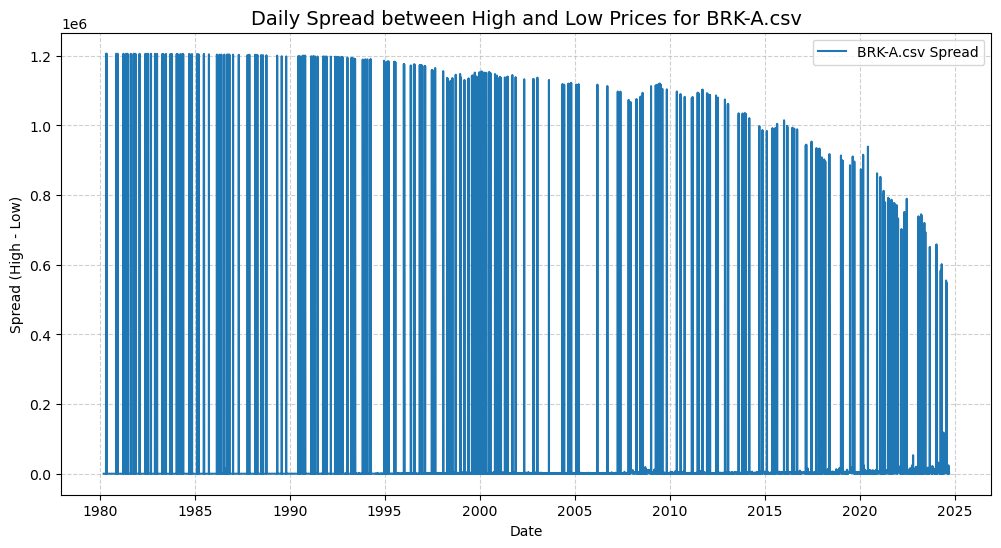

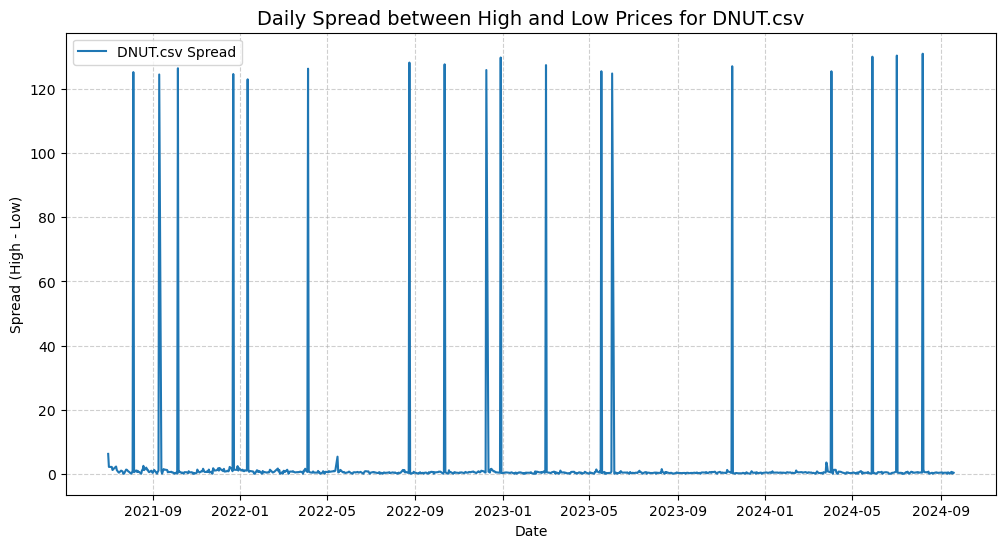

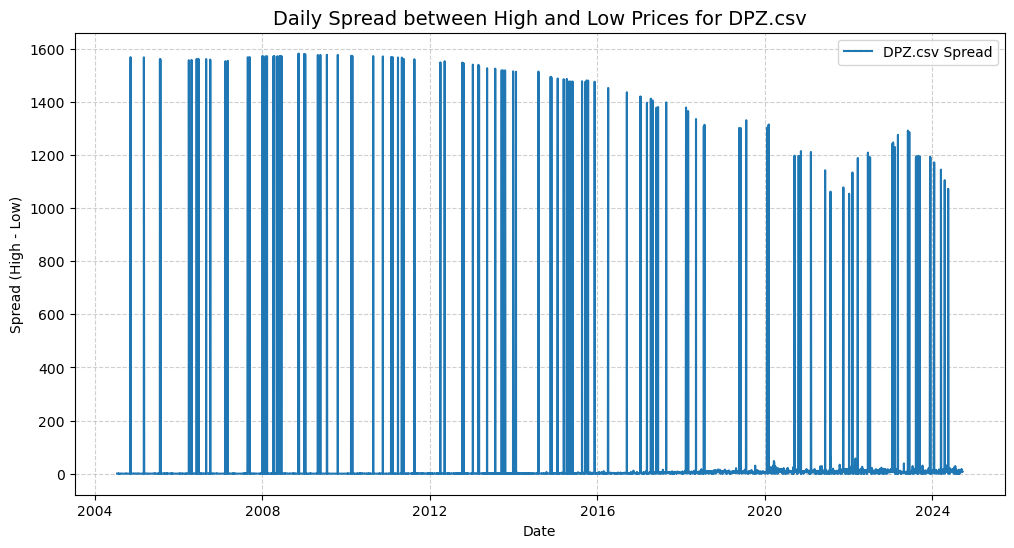

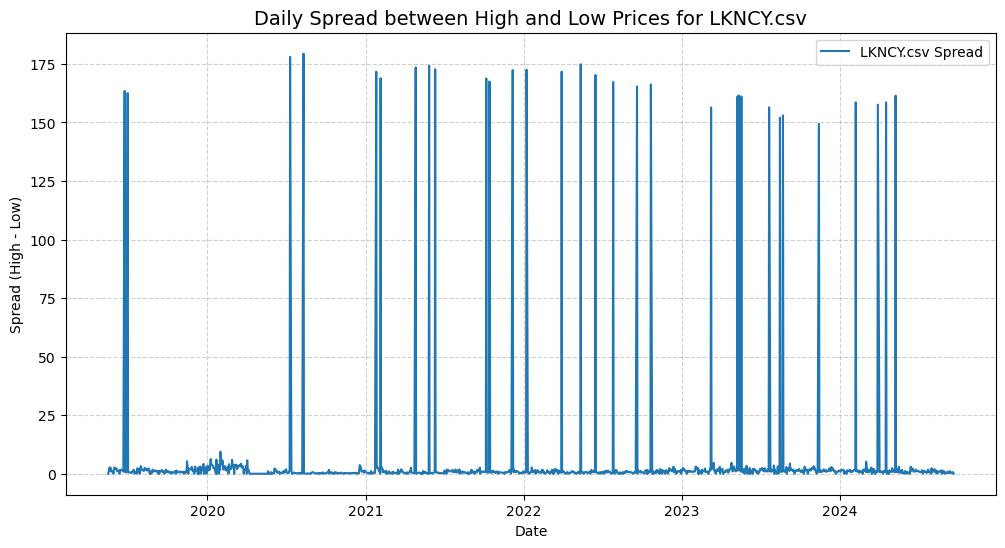

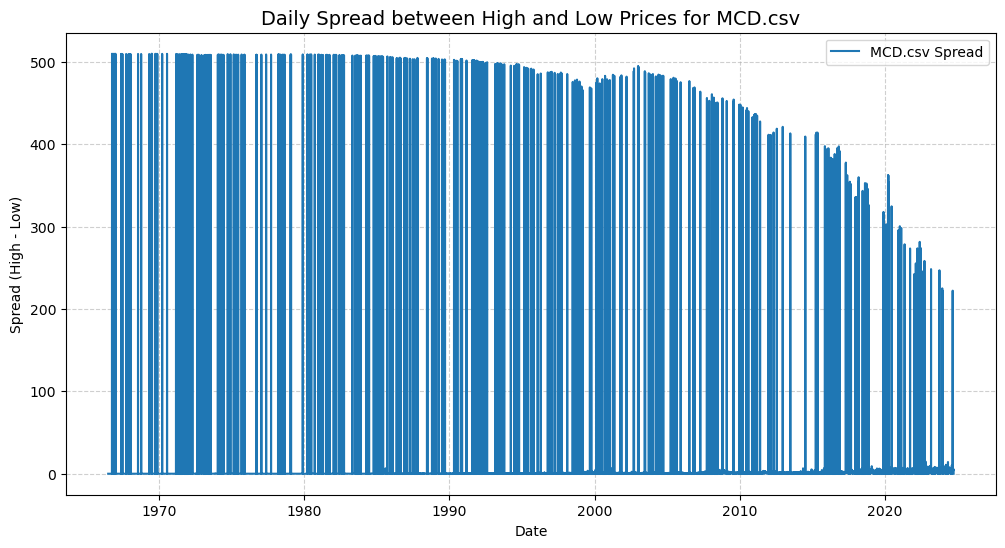

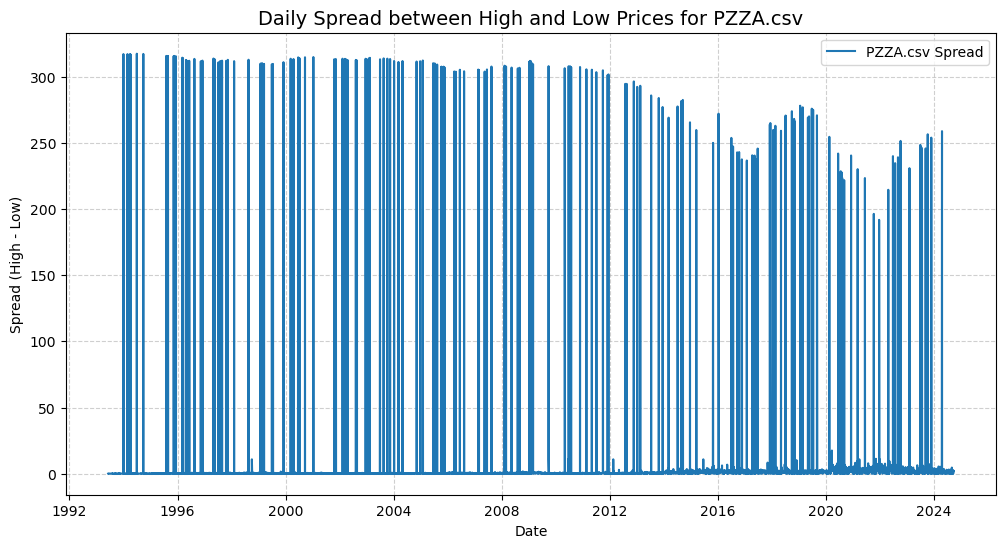

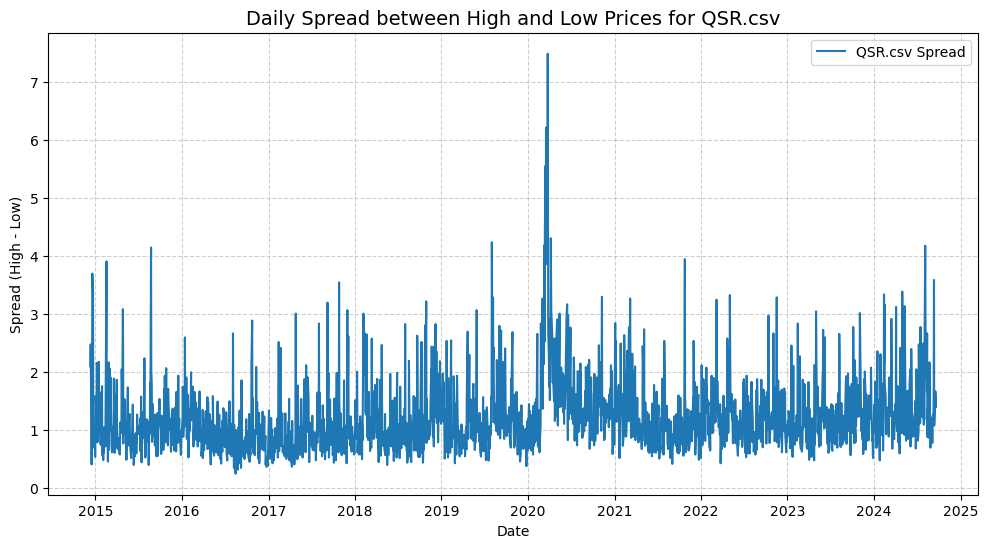

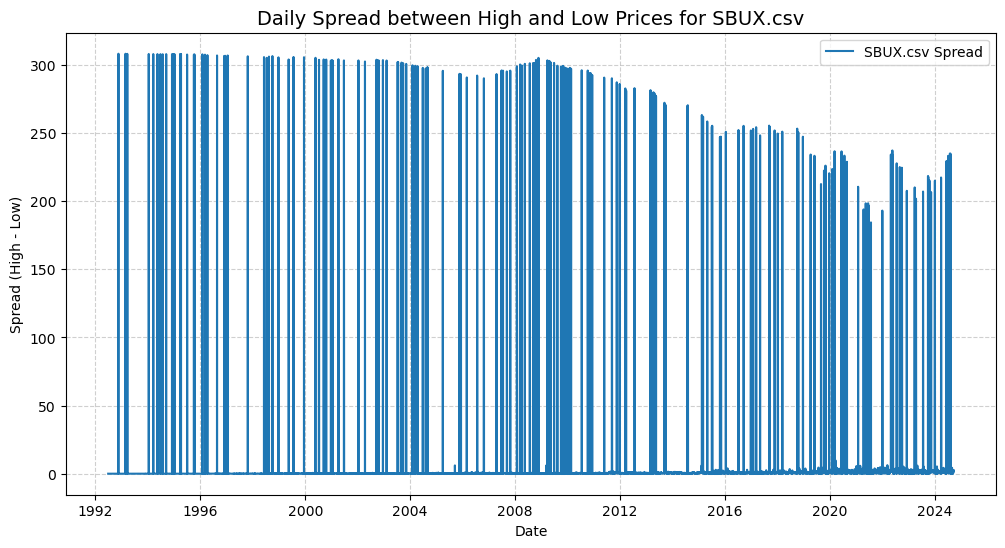

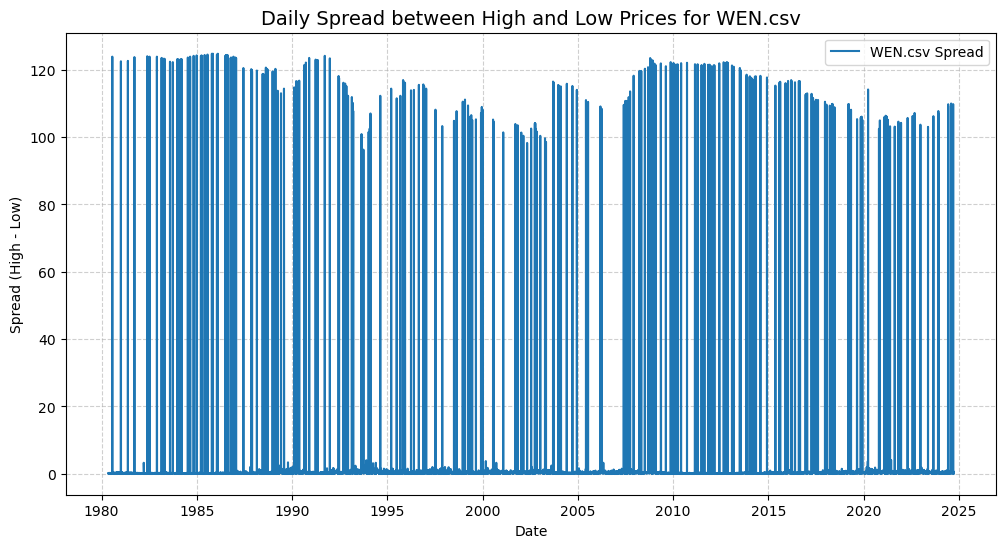

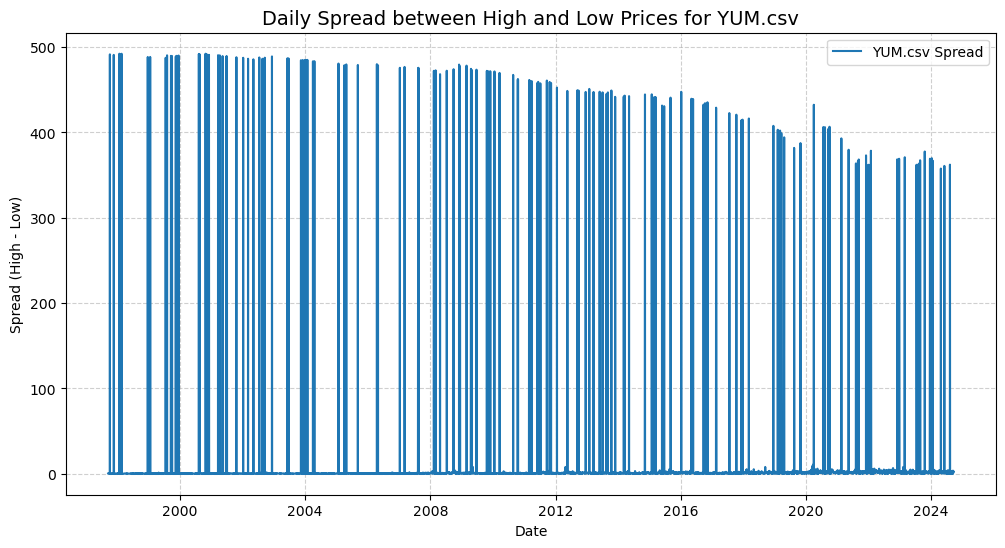

In [27]:
# Visualization Step: Plot the spread for each company
for company, df in data_dict.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Spread'], label=f'{company} Spread', linewidth=1.5)
    plt.title(f'Daily Spread between High and Low Prices for {company}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Spread (High - Low)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [28]:
# Calculate the average spread for each company
average_spreads = {
    company: df['Spread'].mean() for company, df in df_spread.items()
}

# Display the average spread for each company
for company, avg_spread in average_spreads.items():
    print(f"Average Spread for {company}: {avg_spread}")

Average Spread for BRK-A.csv: 27256.29156266105
Average Spread for DNUT.csv: 3.2882165956608245
Average Spread for DPZ.csv: 37.84999930234686
Average Spread for LKNCY.csv: 4.904187925709633
Average Spread for MCD.csv: 11.655476141220582
Average Spread for PZZA.csv: 7.216621194107881
Average Spread for QSR.csv: 1.2071415295005572
Average Spread for SBUX.csv: 7.007232918948793
Average Spread for WEN.csv: 3.004572512164202
Average Spread for YUM.csv: 11.046172727817195


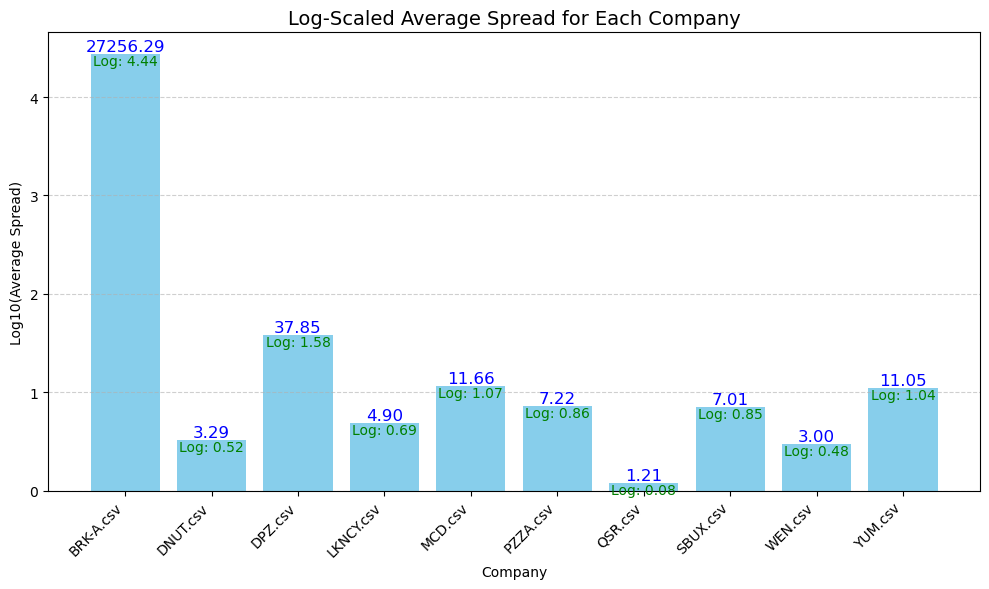

In [29]:
# Visualize the average spread for all companies
plt.figure(figsize=(10, 6))
plt.bar(average_spreads.keys(), np.log10(list(average_spreads.values())), color='skyblue')

# Annotate the bar chart with actual and log-transformed values
for idx, (company, avg_spread) in enumerate(average_spreads.items()):
    plt.text(idx, np.log10(avg_spread), f'{avg_spread:.2f}', ha='center', va='bottom', fontsize=12, color='blue')
    plt.text(idx, np.log10(avg_spread), f'Log: {np.log10(avg_spread):.2f}', ha='center', va='top', fontsize=10, color='green')

plt.title('Log-Scaled Average Spread for Each Company', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Log10(Average Spread)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [30]:
# Interpret the largest spreads
largest_spreads = sorted(average_spreads.items(), key=lambda x: x[1], reverse=True)

summary_data = []
for company, spread in largest_spreads:
    df = df_spread[company]

    # Calculate the mean for High, Low, and Spread columns for comparison with the Average spread column
    high_low_mean = df[['High', 'Low']].mean()
    summary_data.append({
        'Company': company,
        'Average Spread': spread,
        'Statistics': high_low_mean
    })

# Convert to DataFrame to see the sorting of companies by average spread
summary_df = pd.DataFrame([{**{'Company': item['Company'], 'Average Spread': item['Average Spread']}, 
                             **item['Statistics'].to_dict()} for item in summary_data])

summary_df

Company  Average Spread           High            Low
0  BRK-A.csv    27256.291563  149151.750136  147624.859258
1    DPZ.csv       37.849999     195.473074     189.485759
2    MCD.csv       11.655476      63.265174      62.278888
3    YUM.csv       11.046173      61.374767      60.438664
4   PZZA.csv        7.216621      39.502040      38.117639
5   SBUX.csv        7.007233      38.101350      37.383576
6  LKNCY.csv        4.904188      22.518944      20.951241
7   DNUT.csv        3.288217      17.130832      16.634988
8    WEN.csv        3.004573      15.650203      15.229832
9    QSR.csv        1.207142      58.467634      57.260492

### Interpretation of Companies with Top 2 Largest Spreads versus the rest
**Disclaimer: The Interpretations are Purely from the Dataset and theoretical, it does not reflect any real world trends**

As seen from the above average spreads sorted by companies, BRK-A and DPZ and MCD are the top 2 companies with highest average spreads. We surmise the following explanations:

1. **BRK-A. (Berkshire Hathaway):** It has the highest spreads due to its extraordinarily high stock price, often in the hundreds of thousands of dollars. Even small percentage fluctuations in the stock price result in large absolute changes between daily highs and lows, amplifying the spread. For more information, Berkshire Hathaway’s Class A shares are priced so highly in the first place because the company has never split its stock, preserving its long-term investment appeal and exclusivity, so as to attract serious, long-term investors rather than speculators. 

2. **DPZ (Domino's Pizza):** Domino's exhibits higher spreads due to its history of significant growth and volatility, and based on research is driven by investor interest in its expansion strategies and market dominance in the fast-food delivery sector. Growth stocks like DPZ typically experience larger intraday price movements as investors' expectations of rapid revenue growth make its stock more volatile. As a result, price movements within a day tend to be larger, leading to higher spreads compared to more stable stocks.


#### Remaining Companies with a Smaller Average Spread

- The smaller spreads in companies like DNUT (Krispy Kreme), QSR (Restaurant Brands International), and WEN (Wendy's) can be attributed to their relatively lower stock prices and lesser trading volumes. Low stock prices naturally result in smaller absolute differences between highs and lows.
- SBUX (Starbucks) and YUM (Yum Brands) have moderate spreads due to their strong but relatively stable market presence. Their spreads are smaller compared to growth-focused or high-priced stocks because they attract long-term investors with more stable trading patterns.
- PZZA (Papa John's) is also similar to other smaller chains, Papa John's stock is priced lower and trades with less volatility than high-growth or high-value competitors, limiting the daily spreads.
- LKNCY (Luckin Coffee): Despite being a relatively young company, Luckin Coffee's spreads are constrained due to its pricing and trading patterns, reflecting a smaller market footprint.
- MCD (McDonald's) spreads are moderate yet higher than others because of its consistent global performance and market presence. While less volatile than growth stocks, McDonald's significant scale and its relatively high stock price contribute to occasional larger spreads. Additionally, investor confidence in its consistent performance keeps its volatility lower but not negligible.

#### Conclusion:
These spreads reflect a combination of the companies' stock price levels, market volatility, and investor behavior - which are also specific to their business models and growth strategies.
